In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# library to handle JSON files
import json 

# library to handle requests
import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [3]:
import matplotlib as mpl

import matplotlib.pyplot as plt

In [4]:
import folium 
from folium import plugins

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering librar

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
!conda install -c conda-forge geopy --yes

from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.



# 1. Mining & Process Data

In [9]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [10]:
htmlCanada = pd.read_html(url)

In [ ]:
htmlCanada

In [8]:
Canada = pd.DataFrame('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M.csv')

ValueError: DataFrame constructor not properly called!

In [11]:
Canada = pd.DataFrame(htmlCanada[0])

#### **Optional :  Load in computer Desktop**

In [10]:
path = "C:/Users/Mokht/OneDrive/Bureau/Project/Canada_Neigh.xlsx"

In [11]:
Canada.to_csv(path)

### Explore Data

In [9]:
Canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
Postcode         288 non-null object
Borough          288 non-null object
Neighbourhood    288 non-null object
dtypes: object(3)
memory usage: 6.8+ KB


In [ ]:
Canada.shape

In [ ]:
Canada.head(5)

## 1.2 Drop rows 'Not assigned' in column 'Borough'

In [12]:
Canada = Canada[Canada.Borough != 'Not assigned']

In [ ]:
Canada.shape

In [ ]:
Canada.info()

In [ ]:
Canada

## 1.3 Rename long names columns

In [13]:
Canada = Canada.rename(columns={'Postcode' : 'Post','Neighbourhood' : 'Neigh'})

In [11]:
Canada.shape

(211, 3)

In [1]:
Canada.info()

NameError: name 'Canada' is not defined

## 1.4 Group Table into 'Post Code' & Borough. Merging the Neighborhood of each.
 *Obtain the DataFrame where the Neighborhood with same postal code it's merging*

In [15]:
dfcan = Canada.groupby(['Post','Borough'])['Neigh'].apply(','.join).reset_index()

In [13]:
dfcan.size

309

In [14]:
dfcan.shape

(103, 3)

In [15]:
dfcan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Post       103 non-null object
Borough    103 non-null object
Neigh      103 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
dfcan.head()

In [ ]:
dfcan

## 1.5 *Replace Na value in 'Neighborhood' with the 'Borough' value in this row*

In [16]:
dfcan['Neigh'] = dfcan['Neigh'].replace('Not assigned', dfcan.Borough)

In [17]:
dfcan.shape

(103, 3)

In [ ]:
dfcan.info()

In [ ]:
dfcan

# 1.6 Download, Read, and Create DataFrame of Geospatial coordinates 

In [17]:
Geo_path = 'C:/Users/Mokht/OneDrive/Bureau/Project/Geospatial_Coordinates.csv'

In [18]:
GeoRead = pd.read_csv(Geo_path)

In [19]:
df2 = pd.DataFrame(GeoRead)

In [20]:
df2 = df2.drop(['Postal Code'], axis=1)

In [ ]:
df2.info()

In [ ]:
df2.shape

In [ ]:
df2

## 1.7 Concat the 2 Tables. For DataFrame used to Explore & Clustering of Toronto 

In [21]:
Toronto = pd.concat([dfcan,df2] , axis=1)

In [23]:
Toronto.shape

(103, 5)

In [ ]:
Toronto.info()

In [ ]:
Toronto.head()

*Save the new DF*

In [ ]:
Tor_path = 'C:/Users/Mokht\OneDrive/Bureau/Toronto.xlsx'

In [ ]:
Toronto.to_csv(Tor_path)

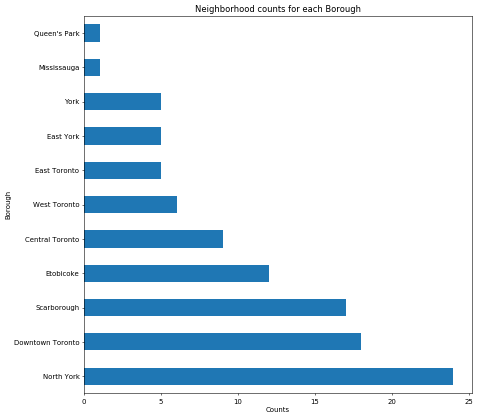

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10), dpi=50)


Toronto.groupby('Borough')['Neigh'].count().nlargest(30).plot(kind='barh')

plt.title('Neighborhood counts for each Borough')
plt.xlabel('Counts')
plt.show()
plt.close()

plt.savefig('C:/Users/Mokht/OneDrive/Bureau/Map_Clust.png')

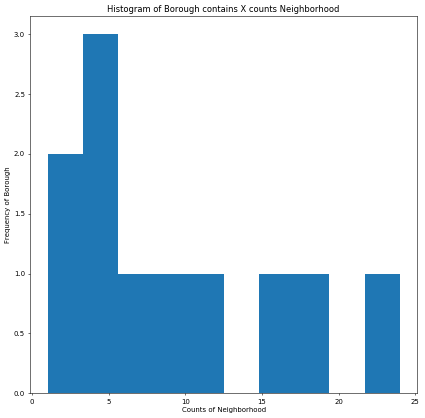

In [30]:
plt.figure(figsize=(10,10), dpi=50)


Toronto.groupby('Borough')['Neigh'].count().nlargest(30).plot(kind='hist')

plt.title('Histogram of Borough contains X counts Neighborhood')
plt.xlabel('Counts of Neighborhood')
plt.ylabel('Frequency of Borough')

plt.show()

## 1.8 *Count of each Borough*

In [18]:
Borough_count = Toronto['Borough'].value_counts()

In [18]:
Borough_count

North York          24
Downtown Toronto    18
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
East York            5
York                 5
Mississauga          1
Queen's Park         1
Name: Borough, dtype: int64

# 2. Analyzing with Visualisation & Clustering
Geographical coordinates of Toronto

In [19]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_Toronto = location.latitude
longitude_Toronto = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude_Toronto, longitude_Toronto))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


### 2.1 Create map of Toronto City

In [26]:
# create map of Canada using latitude and longitude values
map_Toronto = folium.Map(location=[latitude_Toronto, longitude_Toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neigh']):
    label = '{}, {}'.format([neighborhood], borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## 2.3 Create DataFrame with Borough contains 'Toronto'

Merge table to obtain the Table with only 'Toronto' Borough

In [31]:
Borough_Toronto =   Toronto[Toronto['Borough'].str.contains('Downtown Toronto')]

In [24]:
Borough_Toronto

,Post,Borough,Neigh,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
59,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


## 2.4 Concat each DF 'Borough' together. 
*Obtain DF with only Borough ''Toronto''*

In [25]:
Borough_Toronto.shape

(18, 5)

In [26]:
Borough_Toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 50 to 75
Data columns (total 5 columns):
Post         18 non-null object
Borough      18 non-null object
Neigh        18 non-null object
Latitude     18 non-null float64
Longitude    18 non-null float64
dtypes: float64(2), object(3)
memory usage: 864.0+ bytes


In [27]:
Borough_Toronto

,Post,Borough,Neigh,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
59,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


## 2.5 Get adress with Geocoder

The geograpical coordinate of Toronto City are 43.653963, -79.387207.

The geograpical coordinate of Toronto Borough are 43.6541737, -79.3808116451341.

In [36]:
address = 'Downtown Toronto, Toronto '

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_Borough = location.latitude
longitude_Borough = location.longitude
print('The geograpical coordinate of Toronto Borough are {}, {}.'.format(latitude_Borough, longitude_Borough))

The geograpical coordinate of Toronto Borough are 43.6541737, -79.3808116451341.


### 2.6 **Create Map**

In [37]:
# create map of Canada using latitude and longitude values
map_Borough = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# add markers to map
for lat, lng, borough, neigh in zip(Borough_Toronto['Latitude'], Borough_Toronto['Longitude'],Borough_Toronto['Borough'], Borough_Toronto['Neigh']):
    
    label = '{}, {}'.format([neigh], borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Borough)  
    
map_Borough

In [30]:


# create map of Canada using latitude and longitude values
map_Borough = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_Borough)

# add markers to map
for lat, lng, borough, neigh in zip(Borough_Toronto['Latitude'], Borough_Toronto['Longitude'],Borough_Toronto['Borough'], Borough_Toronto['Neigh']):
    
    label = '{}, {}'.format([neigh], borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Borough)  
    
map_Borough

Creditentials for FourSquare Users

In [41]:
CLIENT_ID = 'WDGB5RLTXORZQXYCEU4HJRBBO3CP5IDQ3AF1Z1GU0DS4HJ4R'

CLIENT_SECRET = 'RMMQ1XATUABGPIVD45OXCIHXUGOWZQPRXJFQ55JE3ONVDMDO'

VERSION = '20190730'

# 2.7 TOP 100 venues of Toronto, with 500 radius
## *Get Url Foursquare Api Request*

In [42]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 350 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Borough, 
    longitude_Borough, 
    radius, 
    LIMIT)

url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=WDGB5RLTXORZQXYCEU4HJRBBO3CP5IDQ3AF1Z1GU0DS4HJ4R&client_secret=RMMQ1XATUABGPIVD45OXCIHXUGOWZQPRXJFQ55JE3ONVDMDO&v=20190730&ll=43.6541737,-79.3808116451341&radius=350&limit=100'

### Send request & Get result

In [43]:
results = requests.get(url).json()

In [ ]:
results

# 2.8 All information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']    

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']    

## *Clean Json & Structure it into DF*

In [45]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
2,Indigo,Bookstore,43.653515,-79.380696
3,Ed Mirvish Theatre,Theater,43.655102,-79.379768
4,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
5,CF Toronto Eaton Centre,Shopping Mall,43.654265,-79.380567
6,Yonge-Dundas Square,Plaza,43.656054,-79.380495
7,SEPHORA,Cosmetics Shop,43.653688,-79.380120
8,HomeSense,Furniture / Home Store,43.653187,-79.379237
9,Nordstrom,Clothing Store,43.655041,-79.380966


In [215]:
nearby_path = 'C:/Users/Mokht\OneDrive/Bureau/400Down_Nearby_Venues_Toronto.xlsx'

In [216]:
nearby_venues.to_csv(nearby_path)

# 2.9  Explore Neighborhoods in Cardinal Borough of Toronto 

 #### *Let's create a function to repeat the same process to all the neighborhoods in Toronto*

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
nearby_venues.head()

,name,categories,lat,lng
0,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
2,Indigo,Bookstore,43.653515,-79.380696
3,Ed Mirvish Theatre,Theater,43.655102,-79.379768
4,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980


In [52]:
# create map of Canada using latitude and longitude values
map_Borough = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_Borough)

for latven, lngven, ven, cat in zip(nearby_venues['lat'], nearby_venues['lng'],
                             nearby_venues['name'],nearby_venues['categories']):

    label = '{}, {}'.format(ven,[cat])
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latven,lngven],
    radius=5,
    pop=label,
    color='red',
    fill=True,
    fill_color='#3185cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_Borough)

map_Borough

In [57]:
# create map of Canada using latitude and longitude values
map_Borough = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)


for latven, lngven, ven, cat in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'],nearby_venues['categories']):

    label = '{}, {}'.format([cat],ven)
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latven,lngven],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3185cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Borough)

for lat, lng, borough, neigh in zip(Borough_Toronto['Latitude'], Borough_Toronto['Longitude'],Borough_Toronto['Borough'], Borough_Toronto['Neigh']):
    
    label = '{}, {}'.format([neigh], borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Borough)  
    
map_Borough

In [ ]:
# create map of Canada using latitude and longitude values
map_Borough = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_Borough)

for latven, lngven, ven, cat in zip(nearby_venues['Venue Latitude'], nearby_venues['Venue Longitude'],
                             nearby_venues['Venue'],nearby_venues['Venues Category']):

    label = '{}, {}'.format(ven,[cat])
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latve,lngven]
    radius
    pop=label
    color='red',
    fill=True,
    fill_color='#3185cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_Borough)

# add markers to map
for lat, lng, borough, neigh in zip(Borough_Toronto['Latitude'], Borough_Toronto['Longitude'],Borough_Toronto['Borough'], Borough_Toronto['Neigh']):
    
    label = '{}, {}'.format([neigh], borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Borough)  
    
map_Borough

# 2.10 *Code to run the above function on each neighborhood and create a new dataframe called Borough_Toronto_venues*

In [207]:
Borough_Toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 50 to 75
Data columns (total 5 columns):
Post         18 non-null object
Borough      18 non-null object
Neigh        18 non-null object
Latitude     18 non-null float64
Longitude    18 non-null float64
dtypes: float64(2), object(3)
memory usage: 864.0+ bytes


In [46]:
Borough_Toronto_venues = getNearbyVenues(names=Borough_Toronto['Neigh'],
                                   latitudes=Borough_Toronto['Latitude'],
                                   longitudes=Borough_Toronto['Longitude']
                                  )

Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie


In [47]:
print(Borough_Toronto_venues.shape)
Borough_Toronto_venues.head()

(1064, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Mooredale House,43.678631,-79.380091,Building
1,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
2,Rosedale,43.679563,-79.377529,Betline Trail at Roxborough dr.,43.680530,-79.381490,Bike Trail
3,"Cabbagetown,St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
4,"Cabbagetown,St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant


In [48]:
 Borough_Toronto_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 7 columns):
Neighborhood              1064 non-null object
Neighborhood Latitude     1064 non-null float64
Neighborhood Longitude    1064 non-null float64
Venue                     1064 non-null object
Venue Latitude            1064 non-null float64
Venue Longitude           1064 non-null float64
Venue Category            1064 non-null object
dtypes: float64(4), object(3)
memory usage: 58.3+ KB


In [110]:
Neigh_Tor = Borough_Toronto_venues.groupby('Neighborhood')

## Check how many venues in each Neighborhood

<Figure size 500x500 with 0 Axes>

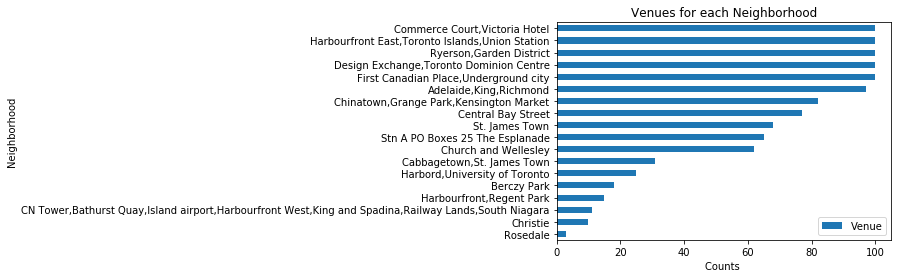

In [120]:
Count_Borough_Venues = Borough_Toronto_venues.groupby('Neighborhood')[['Venue']].count()
Count_Borough_Venues = Count_Borough_Venues.sort_values(by='Venue', ascending=True)

plt.figure(figsize=(10,10), dpi=50)

Count_Borough_Venues.plot(kind='barh')

plt.xlabel('Counts ')
plt.ylabel('Neighborhood')
plt.title('Venues for each Neighborhood')
plt.show()

# Check Restaurant Venues


In [167]:
Restaurant_venues = Borough_Toronto_venues[Borough_Toronto_venues.Venue.str.contains('Restaurant')]

In [168]:
Restaurant_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
46,Church and Wellesley,43.665860,-79.383160,Coach House Restaurant,43.664991,-79.384814,Diner
120,"Ryerson,Garden District",43.657162,-79.378937,The Senator Restaurant,43.655641,-79.379199,Diner
158,"Ryerson,Garden District",43.657162,-79.378937,The Elm Tree Restaurant,43.657397,-79.383761,Modern European Restaurant
181,"Ryerson,Garden District",43.657162,-79.378937,Citrus Restaurant & Lounge @ The Grand Hotel,43.656273,-79.374221,Lounge
215,St. James Town,43.651494,-79.375418,GEORGE Restaurant,43.653346,-79.374445,Restaurant


In [169]:
Restaurant_venues.shape

(23, 7)

Text(0.5, 1.0, 'Restaurant Category Counts')

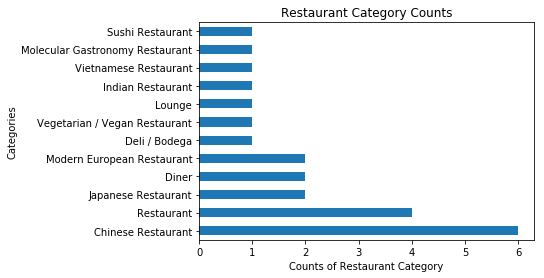

In [171]:
Restaurant_venues['Venue Category'].value_counts().plot(kind='barh')

plt.xlabel('Counts of Restaurant Category')
plt.ylabel('Categories')

plt.title('Restaurant Category Counts')

Text(0.5, 1.0, 'Restaurant Venues Counts')

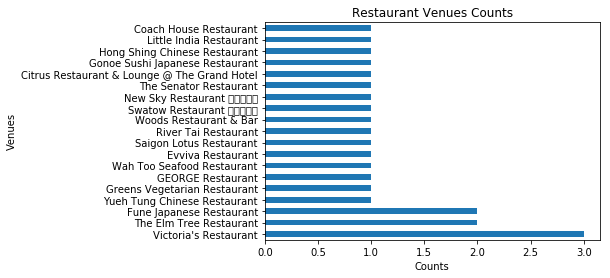

In [175]:
Restaurant_venues['Venue'].value_counts().plot(kind='barh')

plt.ylabel('Venues')
plt.xlabel('Counts')


plt.title('Restaurant Venues Counts')

Text(0.5, 1.0, 'Counts of Venues per Neighborhood')

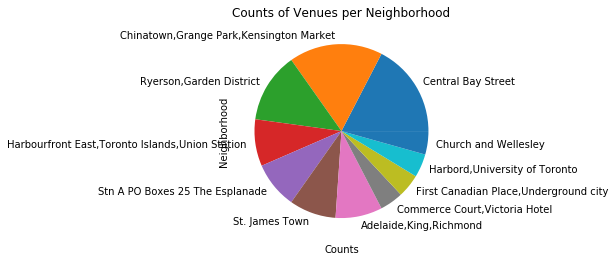

In [179]:
Restaurant_venues['Neighborhood'].value_counts().plot(kind='pie')

plt.xlabel('Counts')
plt.ylabel('Neighborhood')
plt.title('Counts of Venues per Neighborhood')

Text(0.5, 1.0, 'Counts of Restaurant per Neighborhood')

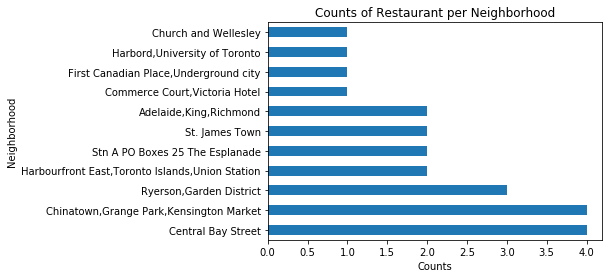

In [182]:
Restaurant_venues['Neighborhood'].value_counts().plot(kind='barh')

plt.xlabel('Counts')
plt.ylabel('Neighborhood')
plt.title('Counts of Restaurant per Neighborhood')

In [284]:
Venue_Restaurant = Restaurant_venues.groupby(['Venue'])['Venue Category'].sum()

In [285]:
Venue_Restaurant

Venue
Citrus Restaurant & Lounge @ The Grand Hotel                                               Lounge
Coach House Restaurant                                                                      Diner
Evviva Restaurant                                                                   Deli / Bodega
Fune Japanese Restaurant                        Japanese RestaurantJapanese RestaurantJapanese...
GEORGE Restaurant                                                                      Restaurant
Gonoe Sushi Japanese Restaurant                                                  Sushi Restaurant
Greens Vegetarian Restaurant                                        Vegetarian / Vegan Restaurant
Little India Restaurant                                                         Indian Restaurant
New Sky Restaurant 小沙田食家                                                       Chinese Restaurant
River Tai Restaurant                                                           Chinese Restaurant
Saigon Lotus R

Text(0.5, 0, 'Bins Venue Category')

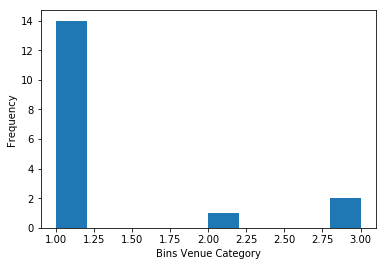

In [286]:
Restaurant_venues.groupby('Venue')['Venue Category'].count().plot(kind='hist')

plt.xlabel('Bins Venue Category')

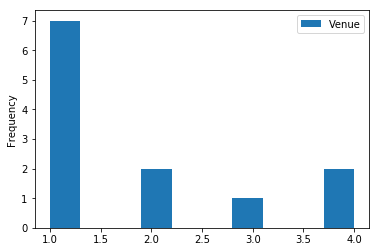

In [269]:
Restaurant_venues.groupby('Venue Category')[['Venue']].count().plot(kind='hist')

plt.xlabel('Venue')

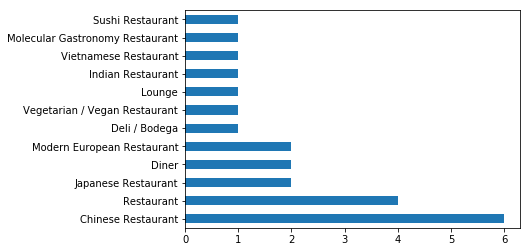

In [180]:
Restaurant_venues['Venue Category'].value_counts().plot(kind='barh')

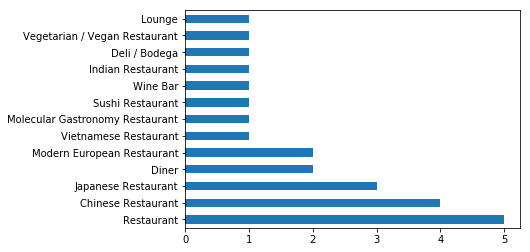

In [110]:
Restaurant_venues['Venue Category'].value_counts().plot(kind='barh')

In [ ]:
Restaurant_venues

In [103]:
Restaurant_venues = Borough_Toronto_venues.apply(['Venue'].str.contains('Restaurant'))

AttributeError: 'list' object has no attribute 'str'

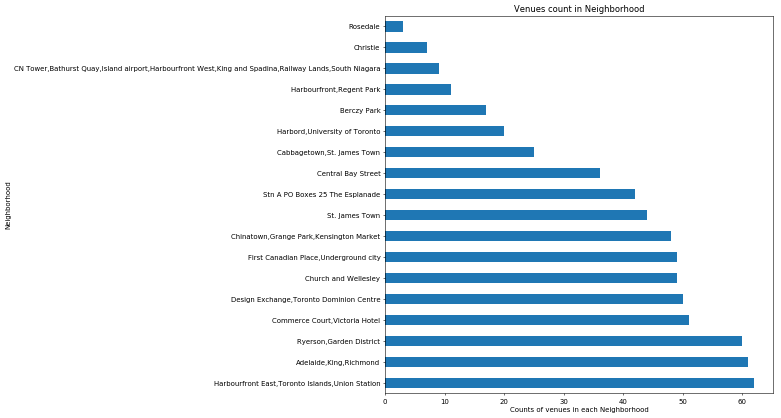

In [183]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues.groupby('Neighborhood')['Venue'].count().nlargest(40).plot(kind='barh')

plt.xlabel('Counts of venues in each Neighborhood')
plt.ylabel('Neighborhood')
plt.title('Venues count in Neighborhood')
plt.show()

# Counts : *How many venues were returned for each neighborhood*

In [131]:
Count_Borough_Venues = Borough_Toronto_venues.groupby('Neighborhood')[['Venue']].count()

In [137]:
Count_Borough_Venues = Count_Borough_Venues.sort_values(by='Venue', ascending=True)

<Figure size 500x500 with 0 Axes>

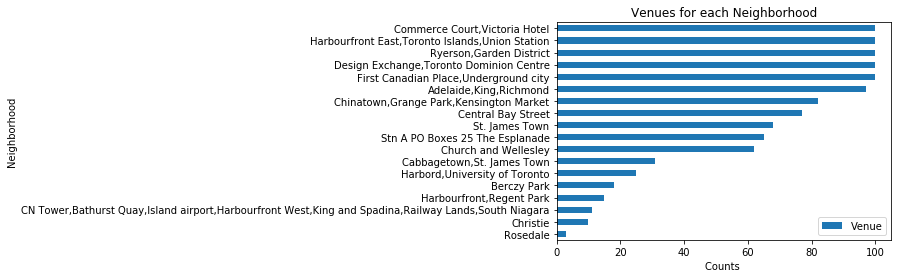

In [184]:
Count_Borough_Venues = Borough_Toronto_venues.groupby('Neighborhood')[['Venue']].count()
Count_Borough_Venues = Count_Borough_Venues.sort_values(by='Venue', ascending=True)

plt.figure(figsize=(10,10), dpi=50)

Count_Borough_Venues.plot(kind='barh')

plt.xlabel('Counts ')
plt.ylabel('Neighborhood')
plt.title('Venues for each Neighborhood')
plt.show()

## Visualisation :  Frequency of Venues Category within Counts Venues

<Figure size 500x500 with 0 Axes>

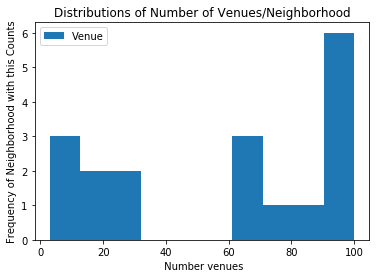

In [186]:


plt.figure(figsize=(10,10), dpi=50)

Count_Borough_Venues.plot(kind='hist')

plt.xlabel(' Number venues')
plt.ylabel('Frequency of Neighborhood with this Counts')
plt.title('Distributions of Number of Venues/Neighborhood')
plt.show()

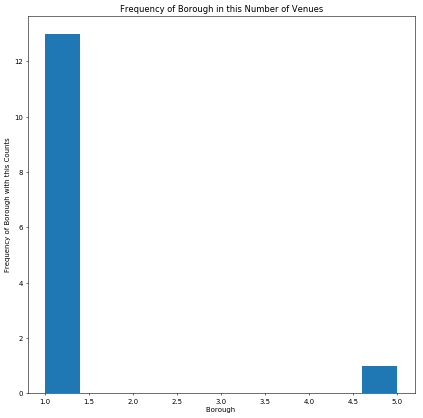

In [139]:


plt.figure(figsize=(10,10), dpi=50)

Count_Borough_Venues['Venue'].value_counts().plot(kind='hist')

plt.xlabel('Borough ')
plt.ylabel('Frequency of Borough with this Counts')
plt.title('Frequency of Borough in this Number of Venues')
plt.show()

# Count Venues Category

In [54]:
Count_Venues_Categ = Borough_Toronto_venues.groupby('Venue Category')[['Venue']].count()

In [55]:
Count_Venues_Categ .head()

,Venue
Venue Category,
Airport,1
Airport Food Court,1
Airport Gate,1
Airport Lounge,2
Airport Service,1


Text(0.5, 0, 'Counts')

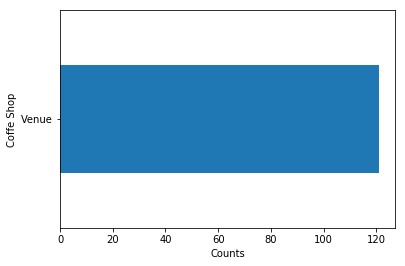

In [68]:
Count_Venues_Categ.max().plot(kind='barh')

plt.ylabel('Coffe Shop')
plt.xlabel('Counts')

<Figure size 2000x2000 with 0 Axes>

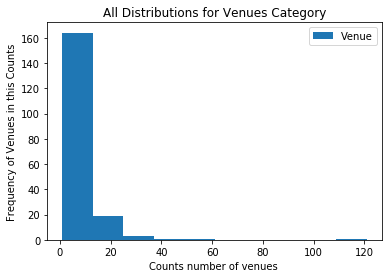

In [155]:
plt.figure(figsize=(20,20), dpi=100)

Count_Venues_Categ.plot(kind='hist')

plt.title('All Distributions for Venues Category')
plt.xlabel('Counts number of venues ')
plt.ylabel('Frequency of Venues in this Counts')
plt.show()

# Group each Neighborhood with the Venue Category & Venues Counts

In [128]:
Neigh_Venues = Borough_Toronto_venues.groupby(['Neighborhood','Venue Category'])[['Venue']].count()

In [129]:
Neigh_Venues.head()

Venue
Neighborhood           Venue Category            
Adelaide,King,Richmond American Restaurant      3
                       Asian Restaurant         3
                       Bakery                   1
                       Bank                     1
                       Bar                      3

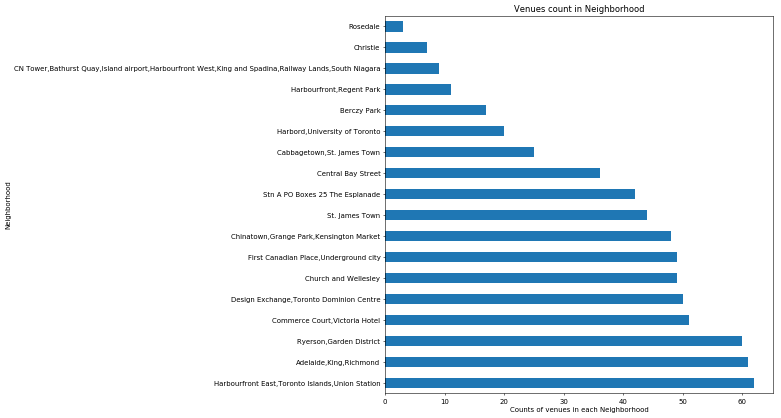

In [130]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues.groupby('Neighborhood')['Venue'].count().nlargest(40).plot(kind='barh')

plt.xlabel('Counts of venues in each Neighborhood')
plt.ylabel('Neighborhood')
plt.title('Venues count in Neighborhood')
plt.show()

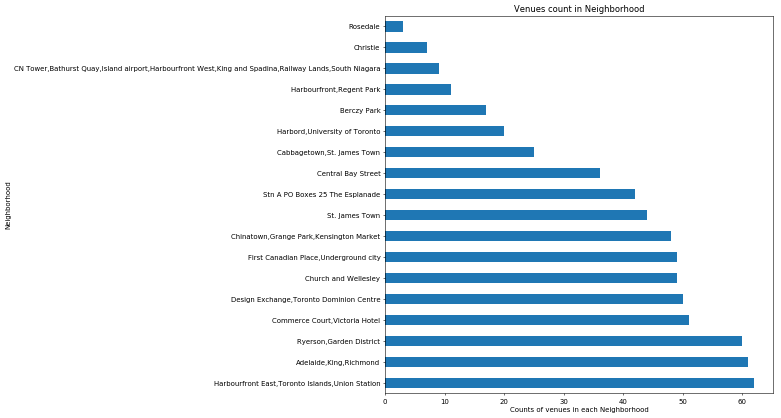

In [187]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues.groupby('Neighborhood')['Venue'].count().nlargest(90).plot(kind='barh')

plt.xlabel('Counts of venues in each Neighborhood')
plt.ylabel('Neighborhood')
plt.title('Venues count in Neighborhood')
plt.show()

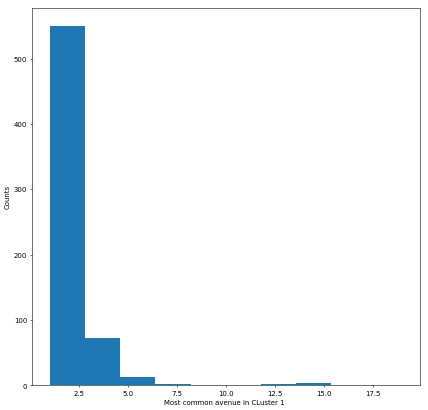

In [189]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues['Venue'].plot(kind='hist')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

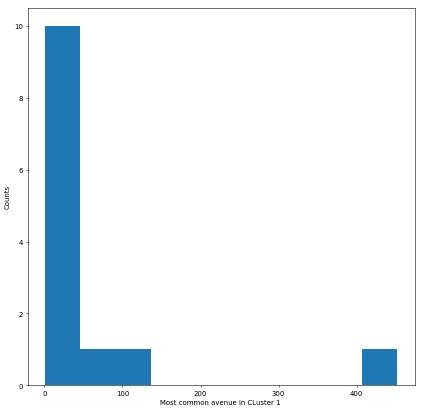

In [156]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues['Venue'].value_counts().plot(kind='hist')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

In [195]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues['Venue Category'].plot(kind='hist')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

KeyError: 'Venue Category'

<Figure size 500x500 with 0 Axes>

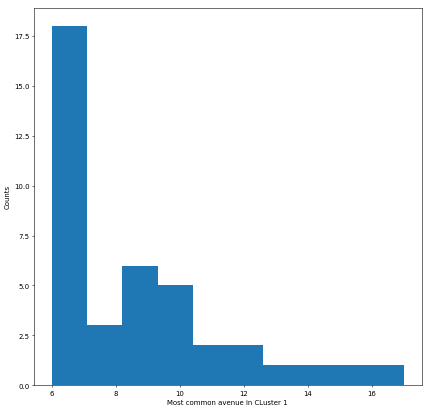

In [157]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues.groupby('Venue Category')['Venue'].count().nlargest(40).plot(kind='hist')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

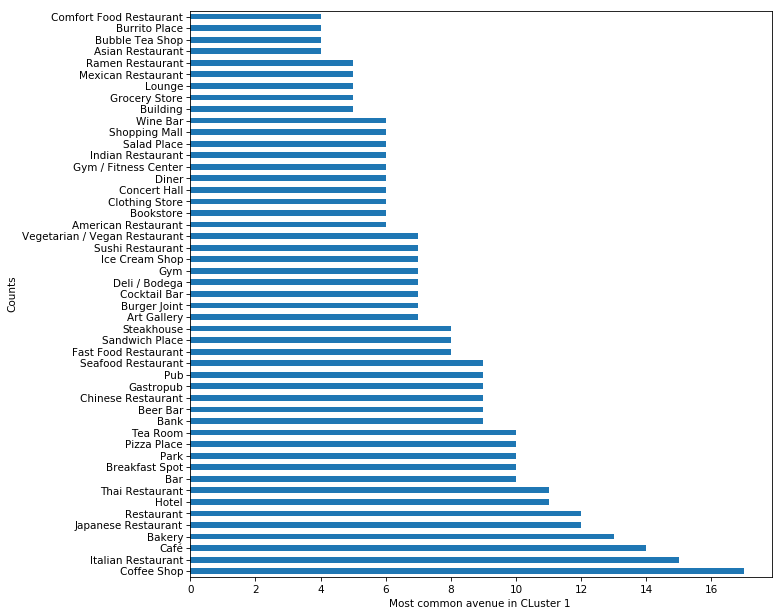

In [159]:
plt.figure(figsize=(10,10), dpi=75)


Neigh_Venues.groupby('Venue Category')['Venue'].count().nlargest(49).plot(kind='barh')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

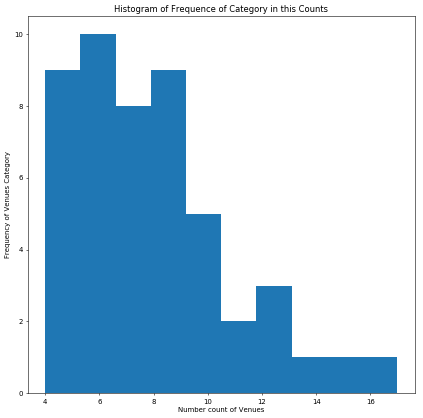

In [160]:
plt.figure(figsize=(10,10), dpi=50)


Neigh_Venues.groupby('Venue Category')['Venue'].count().nlargest(49).plot(kind='hist')

plt.xlabel('Number count of Venues')

plt.ylabel('Frequency of Venues Category')

plt.title('Histogram of Frequence of Category in this Counts')
plt.show()

## OTHERS TEST

In [ ]:
TCount_Neigh_Venues = Borough_Toronto_venues.groupby(['Neighborhood','Venue Category'])[['Venue']].count()

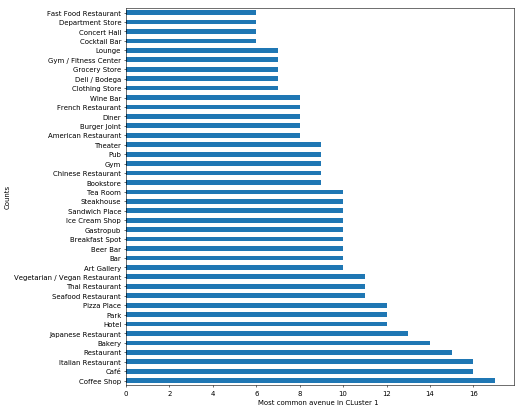

In [53]:
plt.figure(figsize=(10,10), dpi=50)


TCount_Neigh_Venues.groupby('Venue Category')['Venue'].count().nlargest(40).plot(kind='barh')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

### 2.11 *Borough Toronto : Let's find out how many unique categories can be curated from all the returned venues*

In [87]:
print('There are {} uniques categories.'.format(len(Borough_Toronto_venues['Venue Category'].unique())))

There are 189 uniques categories.


In [86]:
 print('There are {} uniques venues.'.format(len(Borough_Toronto_venues['Venue'].unique())))

There are 666 uniques venues.


In [198]:
Borough_Toronto_venues['Venue'].plot(kind='hist')

TypeError: Empty 'DataFrame': no numeric data to plot

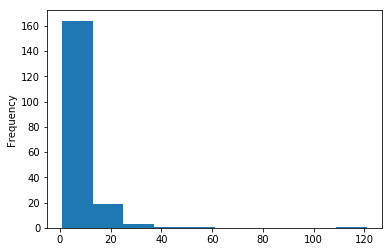

In [331]:
Borough_Toronto_venues['Venue Category'].value_counts().plot(kind='hist')

Unique categories can be curated from all the returned venues in All Toronto

 ## TESTING : Others groupby

In [88]:
Borough_Venues_Sum = Borough_Toronto_venues.groupby('Venue').min()

 Rows : number of venues

In [199]:
Borough_Venues_Sum.shape

(666, 6)

In [90]:
Borough_Venues_Sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 306 Yonge Street - Jordan Store to ½ oz. Cocktail Emporium
Data columns (total 6 columns):
Neighborhood              666 non-null object
Neighborhood Latitude     666 non-null float64
Neighborhood Longitude    666 non-null float64
Venue Latitude            666 non-null float64
Venue Longitude           666 non-null float64
Venue Category            666 non-null object
dtypes: float64(4), object(2)
memory usage: 36.4+ KB


In [91]:
Borough_Venues_Sum.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Category
Venue,,,,,,
306 Yonge Street - Jordan Store,"Ryerson,Garden District",43.657162,-79.378937,43.656495,-79.381015,Sporting Goods Shop
4 Life Natural Foods,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,43.655275,-79.402374,Farmers Market
401 Games,Church and Wellesley,43.665860,-79.383160,43.663623,-79.384037,Hobby Shop
A & C Games,"Harbord,University of Toronto",43.662696,-79.400049,43.664939,-79.403194,Video Game Store
A&W,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,43.641367,-79.377942,Fast Food Restaurant


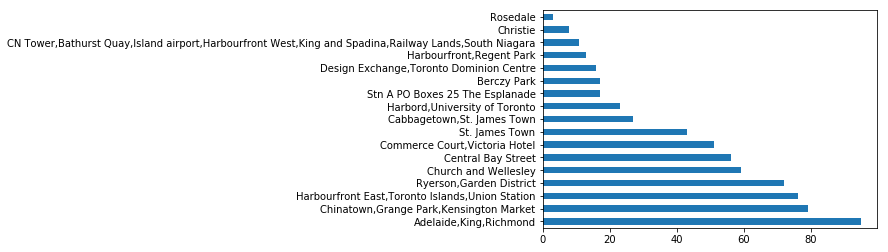

In [92]:
Borough_Venues_Sum['Neighborhood'].value_counts().plot(kind='barh')

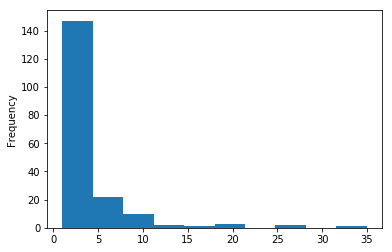

In [93]:
Borough_Venues_Sum['Venue Category'].value_counts().plot(kind='hist')

In [98]:
Categ_Bor_venues = Borough_Toronto_venues.groupby('Venue Category').max()

 Rows = number of Categories venues

In [97]:
Categ_Bor_venues.shape

(189, 6)

In [53]:
Categ_Bor_venues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, Afghan Restaurant to Yoga Studio
Data columns (total 6 columns):
Neighborhood              239 non-null object
Neighborhood Latitude     239 non-null float64
Neighborhood Longitude    239 non-null float64
Venue                     239 non-null object
Venue Latitude            239 non-null float64
Venue Longitude           239 non-null float64
dtypes: float64(4), object(2)
memory usage: 13.1+ KB


In [99]:
Categ_Bor_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Airport,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,Billy Bishop Toronto City Airport (YTZ) (Billy...,43.631579,-79.395605
Airport Food Court,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,Billy Bishop Café,43.631132,-79.396139
Airport Gate,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,Gate 8,43.631536,-79.394570
Airport Lounge,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,Porter Lounge,43.631360,-79.395756
Airport Service,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,Porter Airlines Check-In Counter,43.631683,-79.395454


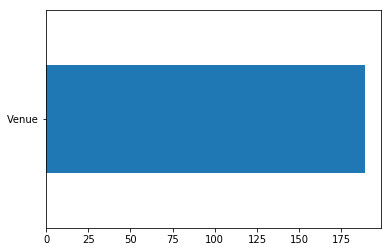

In [100]:
Categ_Bor_venues[['Venue']].count().plot(kind='barh')

In [542]:
Categ_Bor_venues.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [55]:
path = "C:/Users/Mokht/OneDrive/Bureau/Project/Cat_venues_Toronto.xlsx"

In [57]:
Categ_Bor_venues.to_csv(path)

# 3.1 Analysis of venues in Borough contains 'Toronto'

In [209]:
# one hot encoding
Borough_Toronto_onehot = pd.get_dummies(Borough_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Borough_Toronto_onehot['Neighborhood'] = Borough_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Borough_Toronto_onehot.columns[-1]] + list(Borough_Toronto_onehot.columns[:-1])
Borough_Toronto_onehot = Borough_Toronto_onehot[fixed_columns]


Borough_Toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Store,Bike Trail,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [208]:
Borough_Toronto_onehot.shape

(1064, 189)

In [56]:
Borough_Toronto_onehot.shape

(1293, 204)

In [ ]:
Borough_Toronto_onehot.shape

In [203]:
Borough_Toronto_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Columns: 189 entries, Yoga Studio to Wings Joint
dtypes: object(1), uint8(188)
memory usage: 203.7+ KB


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-206-e7d8fa50f2e2>", line 1, in <module>
    Borough_Toronto_onehot.plot(kind='barh')
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 2942, in __call__
    sort_columns=sort_columns, **kwds)
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1973, in plot_frame
    **kwds)
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1801, in _plot
    plot_obj.generate()
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 251, in generate
    self._make_plot()
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1264, in _make_plot
    log=self.log, **kwds)
  File "C:\Users\Mokht\Anaconda3\lib\site-packages\pandas\plotting

KeyboardInterrupt: 

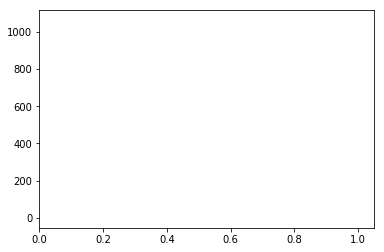

In [206]:
Borough_Toronto_onehot.plot(kind='barh')

## 3.2  Group rows by Neighborhood and by taking the Mean of the frequency of occurrence of each category.

In [210]:
Borough_Toronto_grouped = Borough_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Borough_Toronto_grouped.shape

(18, 189)

In [211]:
Borough_Toronto_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 189 entries, Neighborhood to Wings Joint
dtypes: float64(188), object(1)
memory usage: 26.7+ KB


In [60]:
Borough_Toronto_grouped.head(10)

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.0,0.0,0.010000,0.000000,0.03,0.0000,0.000000,0.0000,0.000000,0.020000,0.000000,0.040000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.01,0.030000,0.00,0.000000,0.01,0.020000,0.010000,0.000000,0.050000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.070000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.03,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.01,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.01,0.0,0.000000,0.01,0.000000,0.010000,0.000000,0.030000,0.010000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.030000,0.00,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.0,0.01,0.01,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.0,0.01,0.0,0.000000,0.0,0.01,0.000000,0.01,0.010000,0.01,0.0,0.00,0.0,0.00000

In [221]:
Borough_Toronto_grouped.Neighborhood.Christie.plot(kind='bar')

AttributeError: 'Series' object has no attribute 'Christie'

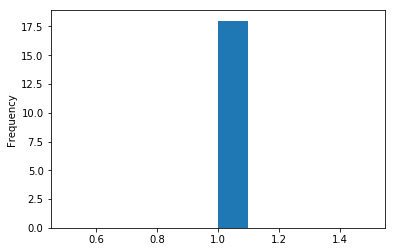

In [215]:
Borough_Toronto_grouped.groupby('Neighborhood')['Yoga Studio'].value_counts().plot(kind='hist')

In [550]:
.groupby([Borough_Toronto_grouped.Neighborhood== 'Christie'])['Afghant Restaurant'].plot(kind='barh')

SyntaxError: invalid syntax (<ipython-input-550-e08d04195c1e>, line 1)

In [373]:
Borough_Toronto_grouped.groupby(['Neighborhood'== 'Christie').apply(Borough_Toronto_grouped.columns(0,150)).apply(value_counts()).plot(kind='barh')

TypeError: 'Index' object is not callable

## 3.3 Print the Frequence top 5 venues in Toronto [Neighborhood]

In [226]:
num_top_venues = 10

for hood in Borough_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Borough_Toronto_grouped[Borough_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.04
2  Japanese Restaurant  0.04
3           Steakhouse  0.04
4                  Bar  0.03
5         Burger Joint  0.03
6  American Restaurant  0.03
7     Asian Restaurant  0.03
8     Sushi Restaurant  0.03
9      Thai Restaurant  0.03


----Berczy Park----
            venue  freq
0    Cocktail Bar  0.11
1  Breakfast Spot  0.06
2            Park  0.06
3      Steakhouse  0.06
4        Beer Bar  0.06
5  Clothing Store  0.06
6     Coffee Shop  0.06
7        Fountain  0.06
8          Lounge  0.06
9    Liquor Store  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
                venue  freq
0      Airport Lounge  0.18
1    Airport Terminal  0.18
2             Airport  0.09
3  Airport Food Court  0.09
4        Airport Gate  0.09
5     Airport Service  0.09
6                 Bar  0.09
7         Coffee Shop  0.09
8

## 3.4 Put it in DataFrame

 First, let's write a function to sort the venues in descending order.

In [227]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## 3.5 Create new DF to display the top 10 venues for each neighborhood.*

In [231]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neigh']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Borough_venues_sorted = pd.DataFrame(columns=columns)
Borough_venues_sorted['Neigh'] = Borough_Toronto_grouped['Neighborhood']

for ind in np.arange(Borough_Toronto_grouped.shape[0]):
    Borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Borough_Toronto_grouped.iloc[ind, :], num_top_venues)

Borough_venues_sorted.head()


,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Japanese Restaurant,Bar,Hotel,Burger Joint,Sushi Restaurant,American Restaurant,Thai Restaurant
1,Berczy Park,Cocktail Bar,Greek Restaurant,Fountain,Comfort Food Restaurant,Grocery Store,Coffee Shop,Clothing Store,Breakfast Spot,Concert Hall,Lounge
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Terminal,Boutique,Coffee Shop,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Dog Run
3,"Cabbagetown,St. James Town",Coffee Shop,Market,Café,Restaurant,Pizza Place,Snack Place,Japanese Restaurant,Beer Store,Pub,Jewelry Store
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Ice Cream Shop,Indian Restaurant,Japanese Restaurant


In [232]:
Borough_venues_sorted.shape

(18, 11)

In [233]:
Borough_venues_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
Neigh                     18 non-null object
1st Most Common Venue     18 non-null object
2nd Most Common Venue     18 non-null object
3rd Most Common Venue     18 non-null object
4th Most Common Venue     18 non-null object
5th Most Common Venue     18 non-null object
6th Most Common Venue     18 non-null object
7th Most Common Venue     18 non-null object
8th Most Common Venue     18 non-null object
9th Most Common Venue     18 non-null object
10th Most Common Venue    18 non-null object
dtypes: object(11)
memory usage: 1.6+ KB


# 4. Clustering

# ELBOW TEST

In [263]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data["clusters"] = kmeans.labels_

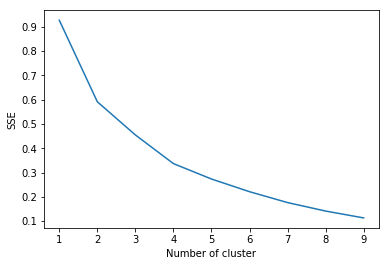

In [271]:
iris = load_iris()


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Elbow_Bor_Toronto_clustering)
   
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [284]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = load_iris().data
y = load_iris()

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.49721766487109664
For n_clusters=5, The Silhouette Coefficient is 0.48874888709310454
For n_clusters=6, The Silhouette Coefficient is 0.36648040289008227
For n_clusters=7, The Silhouette Coefficient is 0.35668824765816853
For n_clusters=8, The Silhouette Coefficient is 0.3520039484603335
For n_clusters=9, The Silhouette Coefficient is 0.3194460886038685
For n_clusters=10, The Silhouette Coefficient is 0.3043954576476588


In [282]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = load_iris().data
y = load_iris().target

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.49721766487109664
For n_clusters=5, The Silhouette Coefficient is 0.48874888709310454
For n_clusters=6, The Silhouette Coefficient is 0.3678464984712234
For n_clusters=7, The Silhouette Coefficient is 0.35882944509656756
For n_clusters=8, The Silhouette Coefficient is 0.35982240575444846
For n_clusters=9, The Silhouette Coefficient is 0.33036743968447563
For n_clusters=10, The Silhouette Coefficient is 0.31103645530988433


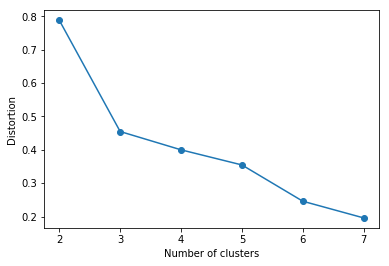

In [270]:
distortions = []
for i in range(2, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=11, max_iter=1000,
        tol=1e-04, random_state=0
    )
    km.fit(Elbow_Bor_Toronto_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(2, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

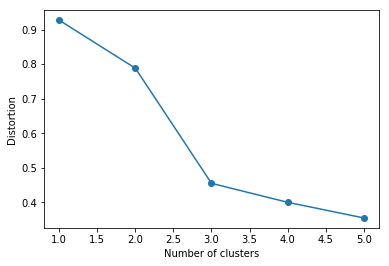

In [251]:
Elbow_Bor_Toronto_clustering = Borough_Toronto_grouped.drop('Neighborhood', 1)

distortions = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=11, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Elbow_Bor_Toronto_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 6), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

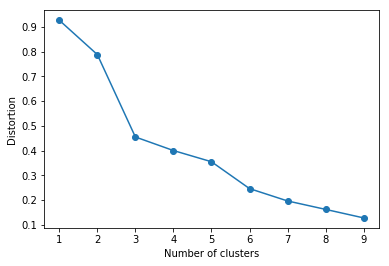

In [234]:
# set number of clusters


Elbow_Bor_Toronto_clustering = Borough_Toronto_grouped.drop('Neighborhood', 1)



distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Elbow_Bor_Toronto_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 4.1 *Run k-means to cluster the neighborhood into 5 clusters.*

In [410]:
# set number of clusters
kclusters = 6

Bor_Toronto_clustering = Borough_Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bor_Toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 2, 1, 4, 1, 0, 4, 4, 4])

## 4.2 Clustering the top 10 venues

 *Drop used for debugging* 

In [408]:
Bor_Venues_sort = Borough_venues_sorted.drop('ClustLabels', axis=1)

KeyError: "['ClustLabels'] not found in axis"

In [409]:
Borough_venues_sorted = Borough_venues_sorted.drop('ClustLabels', axis=1)

KeyError: "['ClustLabels'] not found in axis"

## Test elbow point

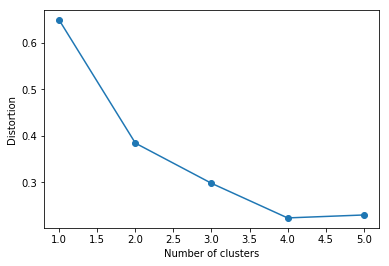

In [120]:
# set number of clusters


Elbow_Bor_Toronto_clustering = Borough_Toronto_grouped.drop('Neighborhood', 1)



distortions = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Elbow_Bor_Toronto_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 6), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [290]:
Borough_venues_sorted.head()

,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Japanese Restaurant,Bar,Hotel,Burger Joint,Sushi Restaurant,American Restaurant,Thai Restaurant
1,Berczy Park,Cocktail Bar,Greek Restaurant,Fountain,Comfort Food Restaurant,Grocery Store,Coffee Shop,Clothing Store,Breakfast Spot,Concert Hall,Lounge
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Terminal,Boutique,Coffee Shop,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Dog Run
3,"Cabbagetown,St. James Town",Coffee Shop,Market,Café,Restaurant,Pizza Place,Snack Place,Japanese Restaurant,Beer Store,Pub,Jewelry Store
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Ice Cream Shop,Indian Restaurant,Japanese Restaurant


### Includes the cluster as well as the top 10 venues for each neighborhood.

In [411]:
#add clustering labels
Borough_venues = Borough_venues_sorted.insert(0, 'ClustLabels', value= kmeans.labels_)

Borough_Merged = Borough_Toronto



# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Borough_Merged = Borough_Merged.join(Borough_venues_sorted.set_index('Neigh'), on='Neigh')

Borough_Merged.head() # check the last columns!Tor_Merged

,Post,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Bike Trail,Playground,Building,Dessert Shop,Ethiopian Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run,Dive Bar
51,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675,1,Coffee Shop,Market,Café,Restaurant,Pizza Place,Snack Place,Japanese Restaurant,Beer Store,Pub,Jewelry Store
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4,Coffee Shop,Gay Bar,Japanese Restaurant,Restaurant,Men's Store,Hotel,Gym,Bubble Tea Shop,Indian Restaurant,Pub
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,5,Coffee Shop,Breakfast Spot,Restaurant,Park,Bakery,Pub,Hotel,Health Food Store,Electronics Store,Gym / Fitness Center
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,4,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Hotel,Café,Restaurant,Movie Theater


In [296]:
Borough_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 50 to 75
Data columns (total 16 columns):
Post                      18 non-null object
Borough                   18 non-null object
Neigh                     18 non-null object
Latitude                  18 non-null float64
Longitude                 18 non-null float64
ClustLabels               18 non-null int32
1st Most Common Venue     18 non-null object
2nd Most Common Venue     18 non-null object
3rd Most Common Venue     18 non-null object
4th Most Common Venue     18 non-null object
5th Most Common Venue     18 non-null object
6th Most Common Venue     18 non-null object
7th Most Common Venue     18 non-null object
8th Most Common Venue     18 non-null object
9th Most Common Venue     18 non-null object
10th Most Common Venue    18 non-null object
dtypes: float64(2), int32(1), object(13)
memory usage: 2.3+ KB


In [298]:
Borough_Merged.shape

(18, 16)

In [412]:
Borough_Merged_Clust = Borough_Merged.sort_values('ClustLabels', ascending=False)

In [413]:
Borough_Merged_Clust.head(10)

,Post,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,5,Coffee Shop,Breakfast Spot,Restaurant,Park,Bakery,Pub,Hotel,Health Food Store,Electronics Store,Gym / Fitness Center
59,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,4,Coffee Shop,Aquarium,Restaurant,Café,Pizza Place,Italian Restaurant,Hotel,Sandwich Place,Park,Brewery
60,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576,4,Coffee Shop,Café,Restaurant,Deli / Bodega,Bar,Hotel,Bakery,Seafood Restaurant,American Restaurant,Asian Restaurant
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4,Coffee Shop,Gay Bar,Japanese Restaurant,Restaurant,Men's Store,Hotel,Gym,Bubble Tea Shop,Indian Restaurant,Pub
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,4,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Hotel,Café,Restaurant,Movie Theater
70,M5X,Downtown Toronto,"First Canadian Place,Underground city",43.648429,-79.382280,4,Coffee Shop,Café,Hotel,Restaurant,Bar,Steakhouse,Bakery,Deli / Bodega,Asian Restaurant,Japanese Restaurant
61,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648198,-79.379817,4,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Bakery,Bar,Gastropub,Seafood Restaurant
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Sandwich Place,Italian Restaurant,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Ice Cream Shop,Indian Restaurant,Japanese Restaurant
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,4,Coffee Shop,Café,Steakhouse,Japanese Restaurant,Bar,Hotel,Burger Joint,Sushi Restaurant,American Restaurant,Thai Restaurant
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Bike Trail,Playground,Building,Dessert Shop,Ethiopian Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run,Dive Bar


Save DataFrame

In [414]:
Clust_path=  'C:/Users/Mokht\OneDrive/Bureau/Down_Tor_K6Clustering_Venues.xlsx'

In [415]:
Borough_Merged_Clust.to_csv(Clust_path)

In [303]:
Borough_Merged_Clust.min()

Post                                         M4W
Borough                         Downtown Toronto
Neigh                     Adelaide,King,Richmond
Latitude                                 43.6289
Longitude                               -79.4226
ClustLabels                                    0
1st Most Common Venue             Airport Lounge
2nd Most Common Venue           Airport Terminal
3rd Most Common Venue                     Bakery
4th Most Common Venue                     Bakery
5th Most Common Venue                    Airport
6th Most Common Venue         Airport Food Court
7th Most Common Venue               Airport Gate
8th Most Common Venue            Airport Service
9th Most Common Venue        American Restaurant
10th Most Common Venue          Asian Restaurant
dtype: object

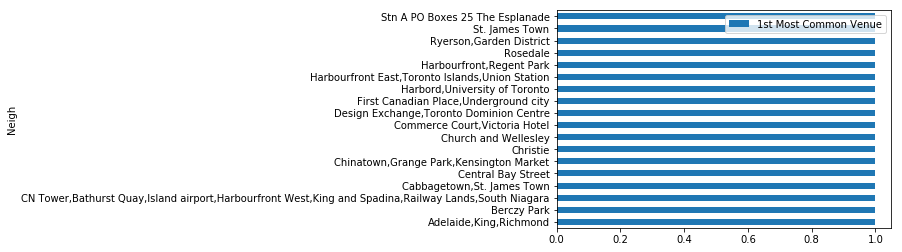

In [360]:
Borough_Merged_Clust.groupby('Neigh')[['1st Most Common Venue']].count().plot(kind='barh')

In [310]:
value_counts = Borough_Merged_Clust[['1st Most Common Venue','2nd Most Common Venue']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

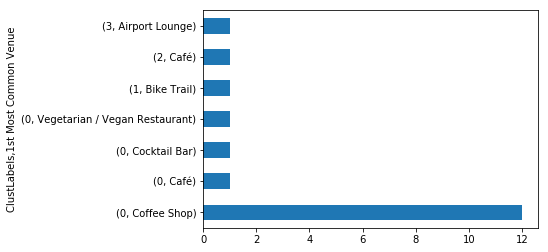

In [305]:
Borough_Merged_Clust.groupby('ClustLabels')['1st Most Common Venue'].value_counts().plot(kind='barh')

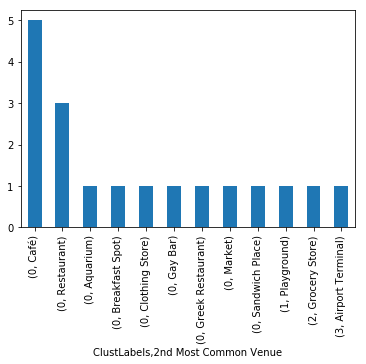

In [322]:
Borough_Merged_Clust.groupby('ClustLabels')['2nd Most Common Venue'].value_counts().plot(kind='bar')

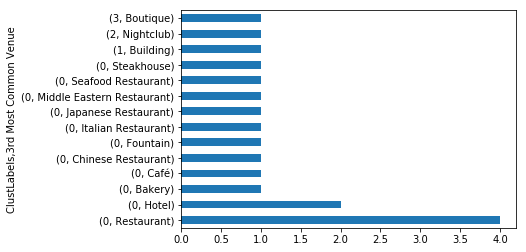

In [326]:
Borough_Merged_Clust.groupby('ClustLabels')['3rd Most Common Venue'].value_counts().plot(kind='barh')

In [501]:
Borough_Merged_Clust.groupby('ClustLabels')['Venue'].size().plot(kind='barh')

KeyError: 'Column not found: Venue'

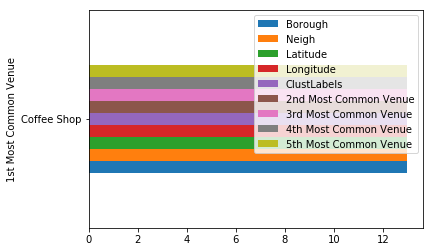

In [494]:
Borough_Merged_Clust.groupby('1st Most Common Venue').count().plot(kind='barh')

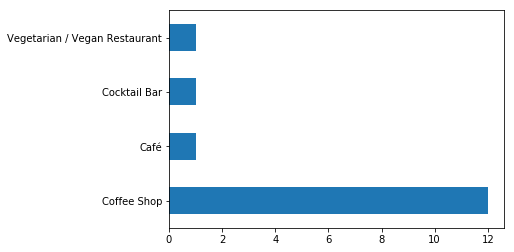

In [331]:
Cluster1['1st Most Common Venue'].value_counts().plot(kind='barh')

In [332]:
Cluster1.shape

(15, 15)

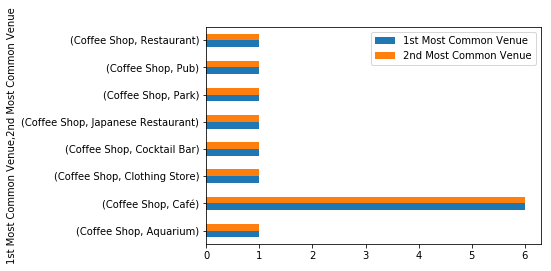

In [508]:
Cluster1.groupby(['1st Most Common Venue','2nd Most Common Venue'])[['1st Most Common Venue','2nd Most Common Venue']].count().plot(kind='barh')

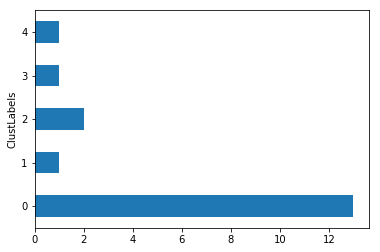

In [511]:
Borough_Merged_Clust.groupby('ClustLabels')['1st Most Common Venue'].count().plot(kind='barh')

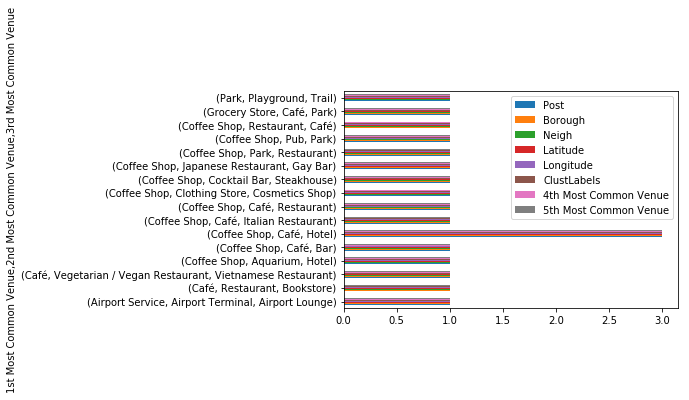

In [489]:
Borough_Merged_Clust.groupby(['1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue']).count().plot(kind='barh')

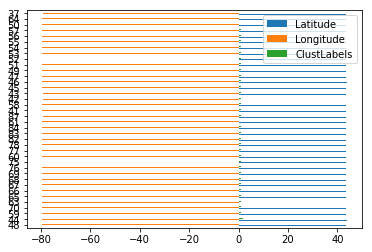

In [217]:
Borough_Merged_Clust.plot(kind='barh')

# 4.3 Map the Clusters

In [ ]:
ListLocation = location[['latitude','longitude']].astype(float).values.tolist()

In [362]:
# create map
Map_Clust = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster, neigh, borough in zip(Borough_Merged['Latitude'], Borough_Merged['Longitude'], Borough_Merged['ClustLabels'], Borough_Merged['Neigh'], Borough_Merged['Borough']):
    label = folium.Popup( str([neigh]) + '  ' + str(borough) + ' ; Cluster ' + str({cluster}), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Map_Clust)
       
Map_Clust

In [445]:
from matplotlib import pyplot as plt

In [1]:
# create map
Map_Clust = folium.Map(location=[latitude_Borough, longitude_Borough], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster, neigh, borough in zip(Borough_Merged['Latitude'], Borough_Merged['Longitude'], Borough_Merged['ClustLabels'], Borough_Merged['Neigh'], Borough_Merged['Borough']):
    label = folium.Popup( str([neigh]) + '  ' + str(borough) + ' ; Cluster ' + str({cluster}), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Map_Clust)



Map_Clust
plt.savefig('C:/Users/Mokht/OneDrive/Bureau/Map_Clust.pdf')   
 

NameError: name 'folium' is not defined

In [451]:
pylab.savefig('foo.png')

NameError: name 'pylab' is not defined

In [449]:
plt.savefig('Map_Clust5.png')
plt.savefig('Map_Cllust5.pdf')

<Figure size 432x288 with 0 Axes>

In [450]:
fig.savefig('path/to/save/image/to.png') 

NameError: name 'fig' is not defined

In [580]:
Borough_Merged.plot(Borough_Merged['Clust Labels' == 1],'1st Most Common Venue')

KeyError: False

In [403]:
 plt.savefig('Map_Clust.png')

<Figure size 432x288 with 0 Axes>

In [574]:
Borough_Merged['1st Most Common Venue'].count().plot(kind='barh')

AttributeError: 'numpy.int32' object has no attribute 'plot'

# 4.4 Explore the Cluster 

*You can modify list range for more column*

### Cluster 1

In [441]:
Cluster1 = Borough_Merged.loc[Borough_Merged['ClustLabels'] == 0,Borough_Merged.columns[[1,2,3,4] + list(range(5, Borough_Merged.shape[1]))]]

In [442]:
Cluster1

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,Downtown Toronto,Christie,43.669542,-79.422564,0,Café,Grocery Store,Nightclub,Coffee Shop,Diner,Italian Restaurant,Baby Store,Department Store,Electronics Store,Dumpling Restaurant


In [395]:
Cluster1pivot = Cluster1.pivot_table('Neigh', Cluster1.columns[5::])

ValueError: Grouper and axis must be same length

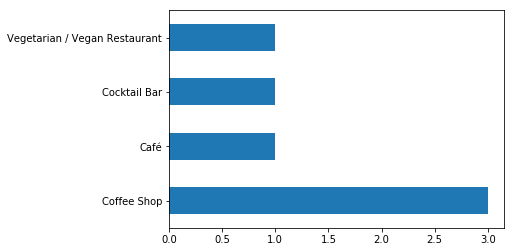

In [444]:
Cluster2['1st Most Common Venue'].value_counts().plot(kind='barh')

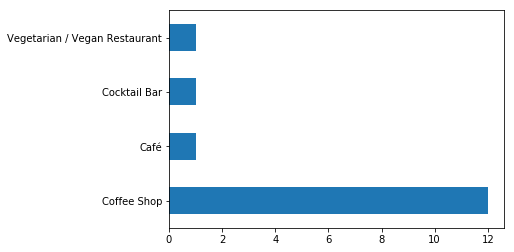

In [333]:
Cluster1['1st Most Common Venue'].value_counts().plot(kind='barh')

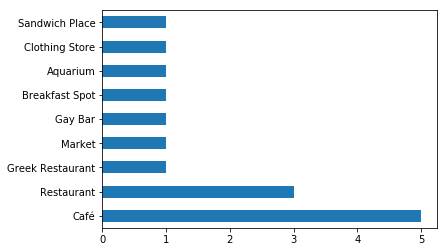

In [390]:
Cluster1['2nd Most Common Venue'].value_counts().plot(kind='barh')

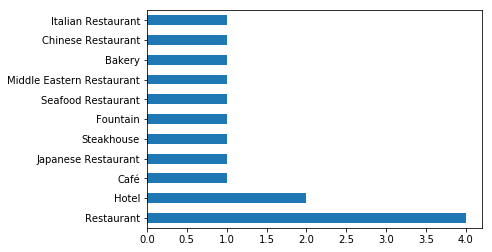

In [391]:
Cluster1['3rd Most Common Venue'].value_counts().plot(kind='barh')

In [400]:
Cluster1.iloc[0:7]

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675,0,Coffee Shop,Market,Café,Restaurant,Pizza Place,Snack Place,Japanese Restaurant,Beer Store,Pub,Jewelry Store
52,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Gay Bar,Japanese Restaurant,Restaurant,Men's Store,Hotel,Gym,Bubble Tea Shop,Indian Restaurant,Pub
53,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,0,Coffee Shop,Breakfast Spot,Restaurant,Park,Bakery,Pub,Hotel,Health Food Store,Electronics Store,Gym / Fitness Center
54,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Hotel,Café,Restaurant,Movie Theater
55,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Restaurant,Hotel,Italian Restaurant,Gastropub,Cocktail Bar,Pizza Place,Café,Park,Diner
56,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Cocktail Bar,Greek Restaurant,Fountain,Comfort Food Restaurant,Grocery Store,Coffee Shop,Clothing Store,Breakfast Spot,Concert Hall,Lounge
57,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Sandwich Place,Italian Restaurant,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Ice Cream Shop,Indian Restaurant,Japanese Restaurant


In [175]:
Cluster1.columns[1:5]

Index(['Neigh', 'Latitude', 'Longitude', 'ClustLabels'], dtype='object')

In [613]:
Venues3TopClust1 = Cluster1[['Neigh', '1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue']]

In [614]:
Venues3TopClust1.head()

,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
51,"Cabbagetown,St. James Town",Coffee Shop,Park,Restaurant
52,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar
53,"Harbourfront,Regent Park",Coffee Shop,Pub,Park
54,"Ryerson,Garden District",Coffee Shop,Clothing Store,Cosmetics Shop
55,St. James Town,Coffee Shop,Restaurant,Café


In [611]:
Venues3TopClust1

'Stn A PO Boxes 25 The EsplanadeCoffee ShopRestaurantSteakhouse'

In [223]:
Venues3TopClust1['1st Most Common Venue'].max()

'Coffee Shop'

In [638]:
Venues3TopClust1['2nd Most Common Venue'].value_counts().count

<bound method Series.count of Café                   6
Cocktail Bar           1
Restaurant             1
Park                   1
Clothing Store         1
Japanese Restaurant    1
Pub                    1
Aquarium               1
Name: 2nd Most Common Venue, dtype: int64>

In [629]:
Venues3TopClust1(['1st Most Common Venue','2nd Most Common Venue'].value_counts()

TypeError: 'DataFrame' object is not callable

In [641]:
Venues3TopClust1[['1st Most Common Venue','2nd Most Common Venue']].max()

1st Most Common Venue    Coffee Shop
2nd Most Common Venue     Restaurant
dtype: object

In [626]:
Venues3TopClust1[['1st Most Common Venue','2nd Most Common Venue']].max()

1st Most Common Venue    Coffee Shop
2nd Most Common Venue     Restaurant
dtype: object

In [615]:
Venues3TopClust1.plot(kind='hist')

TypeError: Empty 'DataFrame': no numeric data to plot

In [230]:
value_counts = Venues3TopClust1[['1st Most Common Venue','2nd Most Common Venue']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [227]:
Venues3TopClust1[['1st Most Common Venue','2nd Most Common Venue']].nunique()

1st Most Common Venue    1
2nd Most Common Venue    8
dtype: int64

In [202]:
Venues3TopClust1.head()

,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
51,"Cabbagetown,St. James Town",Coffee Shop,Park,Restaurant
52,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar
53,"Harbourfront,Regent Park",Coffee Shop,Pub,Park
54,"Ryerson,Garden District",Coffee Shop,Clothing Store,Cosmetics Shop
55,St. James Town,Coffee Shop,Restaurant,Café


In [440]:
Venues3TopClust1.describe()

NameError: name 'Venues3TopClust1' is not defined

In [221]:
Venues3TopClust1['1st Most Common Venue'].max()

'Coffee Shop'

In [203]:
Venues3TopClust1.corr

<bound method DataFrame.corr of                                               Neigh 1st Most Common Venue  \
51                       Cabbagetown,St. James Town           Coffee Shop   
52                             Church and Wellesley           Coffee Shop   
53                         Harbourfront,Regent Park           Coffee Shop   
54                          Ryerson,Garden District           Coffee Shop   
55                                   St. James Town           Coffee Shop   
56                                      Berczy Park           Coffee Shop   
57                               Central Bay Street           Coffee Shop   
58                           Adelaide,King,Richmond           Coffee Shop   
59  Harbourfront East,Toronto Islands,Union Station           Coffee Shop   
60          Design Exchange,Toronto Dominion Centre           Coffee Shop   
61                    Commerce Court,Victoria Hotel           Coffee Shop   
69                  Stn A PO Boxes 25 The Es

In [191]:
Venues3TopClust1.max()

Neigh                    Stn A PO Boxes 25 The Esplanade
1st Most Common Venue                        Coffee Shop
2nd Most Common Venue                         Restaurant
3rd Most Common Venue                         Steakhouse
dtype: object

In [192]:
Venues3TopClust1.max()

Neigh                    Stn A PO Boxes 25 The Esplanade
1st Most Common Venue                        Coffee Shop
2nd Most Common Venue                         Restaurant
3rd Most Common Venue                         Steakhouse
dtype: object

In [198]:
med = Venues3TopClust1.median

In [215]:
Venues3TopClust1.sum()

Neigh                    Cabbagetown,St. James TownChurch and Wellesley...
1st Most Common Venue    Coffee ShopCoffee ShopCoffee ShopCoffee ShopCo...
2nd Most Common Venue    ParkJapanese RestaurantPubClothing StoreRestau...
3rd Most Common Venue    RestaurantGay BarParkCosmetics ShopCaféSteakho...
dtype: object

In [220]:
Venues3TopClust1['1st Most Common Venue'].max()

'Coffee Shop'

In [190]:
Venues3TopClust1.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

 This cluster are the Coffee in Most Common Venue. In 2nd common venus, we are the foreign food ( Italian, Mexican, Japanese)

### Cluster 2

In [438]:
Cluster2 = Borough_Merged.loc[Borough_Merged['ClustLabels'] == 1, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [439]:
Cluster2

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675,1,Coffee Shop,Market,Café,Restaurant,Pizza Place,Snack Place,Japanese Restaurant,Beer Store,Pub,Jewelry Store
55,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Restaurant,Hotel,Italian Restaurant,Gastropub,Cocktail Bar,Pizza Place,Café,Park,Diner
56,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Cocktail Bar,Greek Restaurant,Fountain,Comfort Food Restaurant,Grocery Store,Coffee Shop,Clothing Store,Breakfast Spot,Concert Hall,Lounge
66,Downtown Toronto,"Harbord,University of Toronto",43.662696,-79.400049,1,Café,Restaurant,Bakery,Yoga Studio,College Gym,Beer Bar,Bookstore,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant
67,Downtown Toronto,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,1,Vegetarian / Vegan Restaurant,Café,Chinese Restaurant,Vietnamese Restaurant,Bakery,Mexican Restaurant,Bar,Dumpling Restaurant,Coffee Shop,Dessert Shop
69,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,1,Coffee Shop,Restaurant,Seafood Restaurant,Bakery,Café,Cocktail Bar,Hotel,Cheese Shop,Breakfast Spot,Italian Restaurant


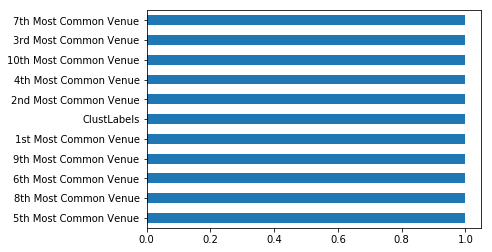

In [341]:
Cluster2.columns[4:15].value_counts().plot(kind='barh')

In [343]:
Top3Clust2 = Cluster2.columns[4:9]

In [344]:
Top3Clust2

Index(['ClustLabels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue'],
      dtype='object')

In [347]:
Top3Clust2= Cluster2[['Neigh','1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue']]

In [348]:
Top3Clust2

,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
50,Rosedale,Bike Trail,Playground,Building


In [353]:
Top3Clust2.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'value_counts'

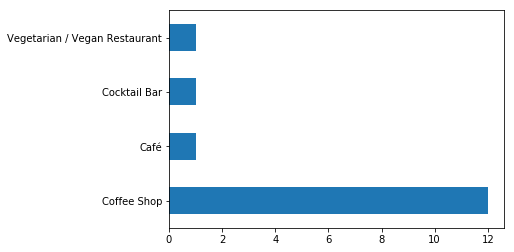

In [387]:
Cluster1['1st Most Common Venue'].value_counts().plot(kind='barh')

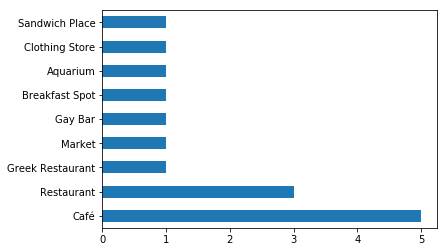

In [386]:
Cluster1['2nd Most Common Venue'].value_counts().plot(kind='barh')

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIkAAAHVCAYAAAB1xqtzAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAG1FJREFUeJzt3X+w3Xdd5/HXmwS6FRaKJNDaH6RqmbHmxgq3HYS6i/xGuglq1TIooSJdmC4K6iK/dhd2hxkWdwCRVcjwqzhMKj/EZCk7QJGyVinltkJCi0gXCi3lx+0MdhVKSOG9f5zvLYdw0yT3nJObpI/HzJ18z/f7Pd/P5/aP7zl93u/3nOruAAAAAHD3do/VngAAAAAAq08kAgAAAEAkAgAAAEAkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAkGTtak9g3Lp163rDhg2rPQ0AAACAY8Y111xza3evP9B+R1Qk2rBhQxYWFlZ7GgAAAADHjKr64sHs53YzAAAAAEQiAAAAAEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEcNps2bUpV3fmzadOm1Z4SAAAA3EkkgsNg06ZN2b17dzZv3pzFxcVs3rw5u3fvFooAAAA4YohEcBgsBaIdO3Zk3bp12bFjx52hCAAAAI4E1d2rPYc7zc/P98LCwmpPg1U2d8ncak+BCe3eKn4BAAAcKarqmu6eP9B+aw/HZOBQHIuBoaruvJJoyZYtW7Jz584cSaEWAACAuy+3m8FhMDc3l507d2bLli259dZb7wxEc3OumgIAAODI4EoiOAx27dqVTZs2ZefOnVm/fn2SUTjatWvXKs8MAAAARkQiOEwEIQAAAI5kbjcDAAAAQCQCAAAAQCQCAAAAIFOMRFW1pqr+vqreNzw+vao+XlWfq6q/qKp7TWssAAAAAKZrmlcS/W6Sz4w9/u9JXtPdZyT5RpJnTnEsAAAAAKZoKpGoqk5J8uQkbxoeV5JHJ3n3sMslSZ4yjbEAAAAAmL5pXUn02iQvSPK94fEDkvxTd98xPL45yclTGgsAAACAKZs4ElXVeUm+3t3XjK9eZtfez/MvqqqFqlpYXFycdDoAAAAArMA0riR6ZJLNVXVjkkszus3stUlOqKq1wz6nJLlluSd397bunu/u+fXr109hOgAAAAAcqokjUXe/qLtP6e4NSS5I8tfd/bQkH0ly/rDb1iQ7Jh0LAAAAgNmY5reb7esPk/xeVd2Q0WcUvXmGYwEAAAAwgbUH3uXgdfcVSa4Ylj+f5JxpHh8AAACA2ZjllUQAAAAAHCVEIgAAAABEIgAAAABEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAIFOIRFV1alV9pKo+U1XXVdXvDut/tKo+VFWfG/69/+TTBQAAAGAWpnEl0R1Jfr+7fyrJw5NcXFVnJnlhkg939xlJPjw8BgAAAOAINHEk6u6vdPe1w/I/J/lMkpOTbElyybDbJUmeMulYAAAAAMzGVD+TqKo2JPnZJB9P8qDu/koyCklJHrif51xUVQtVtbC4uDjN6QAAAABwkKYWiarqPknek+R53f3/DvZ53b2tu+e7e379+vXTmg4AAAAAh2Aqkaiq7plRIHpHd//lsPprVXXSsP2kJF+fxlgAAAAATN80vt2skrw5yWe6+9Vjm3Ym2Tosb02yY9KxAAAAAJiNtVM4xiOT/GaS3VX1yWHdi5O8Msk7q+qZSb6U5FenMBYAAAAAMzBxJOruK5PUfjY/ZtLjAwAAADB7U/12MwAAAACOTiIRAAAAACIRAAAAACIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAACSrJ31AFX1xCR/nGRNkjd19ytnPSYAAADTMXfJ3GpPgQnt3rp7tafAUWKmkaiq1iT5n0kel+TmJJ+oqp3dff0sxwUAAGA6BAa4+5j17WbnJLmhuz/f3d9JcmmSLTMeEwAAAIBDNOtIdHKSm8Ye3zysu1NVXVRVC1W1sLi4OOPpAAAAALCcWUeiWmZd/8CD7m3dPd/d8+vXr5/xdAAAAABYzqwj0c1JTh17fEqSW2Y8JgAAAACHaNaR6BNJzqiq06vqXkkuSLJzxmMCAAAAcIhm+u1m3X1HVf2HJB9IsibJW7r7ulmOCQAAAMChm2kkSpLufn+S9896HAAAAABWbta3mwEAAABwFBCJAAAAABCJAAAAABCJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAAAQkQgAAACAiEQAAAAARCQCAAAAICIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAAAiEgEAAACQCSNRVf1RVf1DVe2qqvdW1Qlj215UVTdU1Wer6gmTTxUAAACAWZn0SqIPJdnY3ZuS/GOSFyVJVZ2Z5IIkP53kiUn+tKrWTDgWAAAAADMyUSTq7g929x3Dw6uSnDIsb0lyaXfv6e4vJLkhyTmTjAUAAADA7EzzM4l+K8n/HpZPTnLT2Labh3U/pKouqqqFqlpYXFyc4nQAAAAAOFhrD7RDVV2e5MRlNr2ku3cM+7wkyR1J3rH0tGX27+WO393bkmxLkvn5+WX3AQAAAGC2DhiJuvuxd7W9qrYmOS/JY7p7KfLcnOTUsd1OSXLLSicJAAAAwGxN+u1mT0zyh0k2d/e3xjbtTHJBVR1XVacnOSPJ1ZOMBQAAAMDsHPBKogN4fZLjknyoqpLkqu5+dndfV1XvTHJ9RrehXdzd351wLAAAAABmZKJI1N0/eRfbXpHkFZMcHwAAAIDDY5rfbgYAAADAUUokAgAAAEAkAgAAAEAkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABAphSJquoPqqqrat3wuKrqdVV1Q1XtqqqHTmMcAAAAAGZj4khUVacmeVySL42tflKSM4afi5L82aTjAAAAADA707iS6DVJXpCkx9ZtSfL2HrkqyQlVddIUxgIAAABgBiaKRFW1OcmXu/tT+2w6OclNY49vHtYtd4yLqmqhqhYWFxcnmQ4AAAAAK7T2QDtU1eVJTlxm00uSvDjJ45d72jLrepl16e5tSbYlyfz8/LL7AAAAADBbB4xE3f3Y5dZX1VyS05N8qqqS5JQk11bVORldOXTq2O6nJLll4tkCAAAAMBMrvt2su3d39wO7e0N3b8goDD20u7+aZGeSpw/fcvbwJLd191emM2UAAAAApu2AVxKt0PuT/GKSG5J8K8mFMxoHAAAAgCmYWiQariZaWu4kF0/r2AAAAADM1kTfbgYAAADAsUEkAgAAAEAkAgAAAEAkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABAphCJquq5VfXZqrquql41tv5FVXXDsO0Jk44DAAAAwOysneTJVfULSbYk2dTde6rqgcP6M5NckOSnk/xYksur6iHd/d1JJwwAAADA9E16JdFzkryyu/ckSXd/fVi/Jcml3b2nu7+Q5IYk50w4FgAAAAAzMmkkekiSn6+qj1fVR6vq7GH9yUluGtvv5mEdAAAAAEegA95uVlWXJzlxmU0vGZ5//yQPT3J2kndW1Y8nqWX27/0c/6IkFyXJaaeddnCzBgAAAGCqDhiJuvux+9tWVc9J8pfd3UmurqrvJVmX0ZVDp47tekqSW/Zz/G1JtiXJ/Pz8siEJAAAAgNma9Hazv0ry6CSpqockuVeSW5PsTHJBVR1XVacnOSPJ1ROOBQAAAMCMTPTtZknekuQtVfXpJN9JsnW4qui6qnpnkuuT3JHkYt9sBgAAAHDkmigSdfd3kvzGfra9IskrJjk+AAAAAIfHpLebAQAAAHAMEIkAAAAAEIkAAAAAEIkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAAAAACISAQAAABCRCAAAAICIRAAAAABEJAIAAAAgIhEAAAAAEYkAAAAAiEgEAAAAQEQiAIBDsn379mzcuDFr1qzJxo0bs3379tWeEgDAVKxd7QkAABwttm/fnq1bt2bv3r1Jkuuuuy5bt25Nkjz1qU9dzakBAExsoiuJquqsqrqqqj5ZVQtVdc6wvqrqdVV1Q1XtqqqHTme6AACr58ILL8zevXuzefPmLC4uZvPmzdm7d28uvPDC1Z4aAMDEJr3d7FVJXt7dZyX5z8PjJHlSkjOGn4uS/NmE4wAArLo9e/bkvPPOy44dO7Ju3brs2LEj5513Xvbs2bPaUwMAmNikt5t1kvsOy/dLcsuwvCXJ27u7k1xVVSdU1Und/ZUJxwMAjhJzl8yt9hSmbuPbNubG3PiDv9v5ycbzNx6Tv+/urbtXewoAwGE0aSR6XpIPVNX/yOiqpEcM609OctPYfjcP60QiALibOBYDQ1Xl+OOPz2WXXZZzzz03V155ZZ785Cfn9ttvz+hvYwAAR68DRqKqujzJictsekmSxyR5fne/p6p+Lcmbkzw2SS2z/7LvnKrqooxuSctpp512kNMGADj85ubmsnv37mzevDnf/OY3c+973zu333575uaOvauIAIC7n5rkr15VdVuSE7q7q6qS3Nbd962qNya5oru3D/t9NsmjDnS72fz8fC8sLKx4PgAAs7Zp06bs3v39q6Tm5uaya9euVZwRAMBdq6prunv+QPtN+sHVtyT5t8Pyo5N8bljemeTpw7ecPTyjeORWMwDgqLdr1650950/AhEAcKyY9DOJnpXkj6tqbZJvZ7htLMn7k/xikhuSfCuJ74UFAAAAOIJNFIm6+8okD1tmfSe5eJJjAwAAAHD4THq7GQAAAADHAJEIAAAAAJEIAAAAAJEIAAAAgIhEAAAAAEQkAgAAACAiEQAAAAARiQAAAACISAQAAABARCIAAAAAIhIBAAAAEJEIAAAAgIhEAAAAACSp7l7tOdypqhaTfHG15wEzti7Jras9CQAm5nwOcGxwPufu4MHdvf5AOx1RkQjuDqpqobvnV3seAEzG+Rzg2OB8Dt/ndjMAAAAARCIAAAAARCJYDdtWewIATIXzOcCxwfkcBj6TCAAAAABXEgEAAAAgEgEAAAAQkQgOSlX9yyHs+6iqesTY42dX1dOH5WdU1Y+tYPwbq2rdoT4P4O7sUM7dKzz+m6rqzGH5xSt4/oaq+vT0ZwZw9KuqE6vq0qr6v1V1fVW9v6oestLz5r7vw6vqiqo6qK+9H97fv+8Qxzvo48ORRCSC6XtUkjsjUXe/obvfPjx8RpJDjkQAHHm6+7e7+/rh4SFHIgCWV1WV5L1Jrujun+juMzM6zz5ogsM+I96HwwGJRLBCVfXvqurjVfX3VXV5VT2oqjYkeXaS51fVJ6vq56vqZVX1B1V1fpL5JO8Yth0/foVQVc1X1RXD8gOq6oPDsd+YpMbG/Y2quno4xhuras3h/t0BjlZV9eCq+nBV7Rr+PW1Y/7aqel1V/V1VfX44Z6eq7lFVf1pV11XV+4a/ZC9tu2I4d78yyfHDefkd+14hNLwGvGxYflhVfaqqPpbk4rF91lTVH1XVJ4a5/fvD+J8F4EjzC0n2dvcbllZ09yeT3LT0eLgy6PVjj983XPGzZjinf7qqdlfV85d7H77coMP5+2+q6trh5xFjm+9bVe8drmp6Q1XdY3jO46vqY8P+76qq++xzzB+az1T+C8GMiESwclcmeXh3/2ySS5O8oLtvTPKGJK/p7rO6+2+Wdu7udydZSPK0Ydvtd3Hs/5LkyuHYO5Ms/U/MTyX59SSP7O6zknw3ydOm/6sBHLNen+Tt3b0pyTuSvG5s20lJzk1yXpJXDut+OcmGJHNJfjvJz+17wO5+YZLbh3P7gc7Jb03yO92973GemeS27j47ydlJnlVVpx/KLwZwDNmY5JoVPvesJCd398bunkvy1kN4H/71JI/r7odm9J57/DXinCS/n9HrwU8k+eXhj70vTfLY4TkLSX7vQPNZ4e8Fh8Xa1Z4AHMVOSfIXVXVSknsl+cIUj/1vMvofk3T3ZVX1jWH9Y5I8LMknRlfh5viMXswAODg/l+H8muTPk7xqbNtfdff3klxfVUu3NJyb5F3D+q9W1UdWOnBV3S/JCd390bHxnzQsPz7JpqWrlJLcL8kZme5rC8DdweeT/HhV/UmSy5J88BCee88kr6+qpT/GPmRs29Xd/fkkqartGb0+fDvJmUn+dnhvfq8kH5vifOCwE4lg5f4kyau7e2dVPSrJy1ZwjDvy/Sv6/tU+23qZ/SvJJd39ohWMBcAPGz/X7hlbrn3+PRTj5/bk++f3yvLn9qVtz+3uD6xgPIBjzXVJzj/APsuea7v7G1X1M0mekNFtvb+W5LcOctznJ/lakp8Zjv3tsW37nr87o3P3h7r7qfs74ITzgcPO7WawcvdL8uVheevY+n9O8q/385x9t92Y0ZVBSfIrY+v/T4bbyKrqSUnuP6z/cJLzq+qBw7YfraoHr3D+AHdHf5fkgmH5aRndOnxXrkzyK8NnEz0ooy8nWM7eqrrnsPy1JA8cPl/uuIxuX0t3/1OS26rq3LHxl3wgyXOWjlGjb/C59yH8XgDHkr9OclxVPWtpRVWdnWT8fe+NSc4azs+nZnQ7WIZbwO7R3e9J8p+SPHTY/67eoy+5X5KvDFeP/maS8c/+PKeqTh8+i+jXM3p9uCrJI6vqJ4exf6Sqxq8+uqv5wBHJlURwcH6kqm4ee/zqjK4celdVfTmjF4ilz474X0neXVVbkjx3n+O8Lckbqur2jG55eHmSN9foq5M/Prbfy5Nsr6prk3w0yZeSpLuvr6qXJvng8AK1N6O/SHxxWr8owDFkuXP37yR5S1X9xySLSS48wDHek9Gtvp9O8o8ZnatvW2a/bUl2VdW13f20qvqvw75fSPIPY/tdOIz/rYzC0JI3ZfTZR9fW6J6FxSRPOajfEuAY091dVb+U5LVV9cKMrui5Mcnzxnb724zOsbszOkdfO6w/Oclblz5YOsnSFfhvyw++D0+Sy6pq77D8sYy+Qe09VfWrST6S5Jtj430so8+rm8voD7rv7e7vVdUzMnrfftyw30szer1Ysr/5wBGpuvd31TMAAFV1n+7+l6p6QJKrM/rygK+u9rwAAKbNlUQAAHftfVV1QkYfSPrfBCIA4FjlSiIAAAAAfHA1AAAAACIRAAAAABGJAAAAAIhIBAAAAEBEIgAAAACS/H8k/8Lk7S9sAwAAAABJRU5ErkJggg==

In [214]:
Venues3TopClust1.quantile([0.25])

ValueError: need at least one array to concatenate

In [354]:
describe = Cluster1.describe(include= 'object')

In [355]:
describe

,Borough,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,15,15,15,15,15,15,15,15,15,15,15,15
unique,1,15,4,9,11,13,11,12,10,14,11,14
top,Downtown Toronto,"Commerce Court,Victoria Hotel",Coffee Shop,Café,Restaurant,Restaurant,Bar,Hotel,Hotel,Café,Coffee Shop,Japanese Restaurant
freq,15,1,12,5,4,3,3,3,4,2,2,2


In [98]:
Cluster2.mean()

Latitude       43.663197
Longitude     -79.392780
ClustLabels     1.000000
dtype: float64

In [ ]:
Cluster2.plot(kind='box', figsize=(20,8))



plt.show()

*Cluster 2 : The most common venue is a Park. After you are a Bus Line, and Swim School.*

### Cluster 3

In [436]:
Cluster3 = Borough_Merged.loc[Borough_Merged['ClustLabels'] == 2, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [437]:
Cluster3

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Downtown Toronto,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,2,Airport Lounge,Airport Terminal,Boutique,Coffee Shop,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Dog Run


*This cluster it's for the services Well being & Artistics activities ! Most commin is the Music venue, Health & Beauty Service, Home Service & Garden.*

### Cluster 4

In [434]:
Clust4 = Borough_Merged.loc[Borough_Merged['ClustLabels'] == 3, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [435]:
Clust4

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Bike Trail,Playground,Building,Dessert Shop,Ethiopian Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run,Dive Bar


In [378]:
Clust4

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Downtown Toronto,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.39442,3,Airport Lounge,Airport Terminal,Boutique,Coffee Shop,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Dog Run


*Cluster 4 : The most common venue is a Restaurant. After you are the Gym, the Park, and Tennis Court. It's a sportive Neighborhood place ?*

### Cluster 5

In [432]:
Cluster5= Borough_Merged.loc[Borough_Merged['ClustLabels'] == 4, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [433]:
Cluster5

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4,Coffee Shop,Gay Bar,Japanese Restaurant,Restaurant,Men's Store,Hotel,Gym,Bubble Tea Shop,Indian Restaurant,Pub
54,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,4,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Hotel,Café,Restaurant,Movie Theater
57,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Sandwich Place,Italian Restaurant,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Ice Cream Shop,Indian Restaurant,Japanese Restaurant
58,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,4,Coffee Shop,Café,Steakhouse,Japanese Restaurant,Bar,Hotel,Burger Joint,Sushi Restaurant,American Restaurant,Thai Restaurant
59,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,4,Coffee Shop,Aquarium,Restaurant,Café,Pizza Place,Italian Restaurant,Hotel,Sandwich Place,Park,Brewery
60,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576,4,Coffee Shop,Café,Restaurant,Deli / Bodega,Bar,Hotel,Bakery,Seafood Restaurant,American Restaurant,Asian Restaurant
61,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648198,-79.379817,4,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Bakery,Bar,Gastropub,Seafood Restaurant
70,Downtown Toronto,"First Canadian Place,Underground city",43.648429,-79.382280,4,Coffee Shop,Café,Hotel,Restaurant,Bar,Steakhouse,Bakery,Deli / Bodega,Asian Restaurant,Japanese Restaurant


Cluster 5 : *Most commons venues are a Park. The playground and Trail are the particularity of this environnement.*

In this 2 Neighborhood, we are the Event Space.

In [423]:
Cluster5= Borough_Merged.loc[Borough_Merged['ClustLabels'] == 5, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [424]:
Cluster5

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Downtown Toronto,"Harbourfront,Regent Park",43.65426,-79.360636,5,Coffee Shop,Breakfast Spot,Restaurant,Park,Bakery,Pub,Hotel,Health Food Store,Electronics Store,Gym / Fitness Center


In [430]:
Cluster6= Borough_Merged.loc[Borough_Merged['ClustLabels'] == 6, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [431]:
Cluster6

,Borough,Neigh,Latitude,Longitude,ClustLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [427]:
Cluster6 = Borough_Merged.loc[Borough_Merged['ClustLabels'] == 6, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]]]

SyntaxError: invalid syntax (<ipython-input-427-2334be464a83>, line 1)

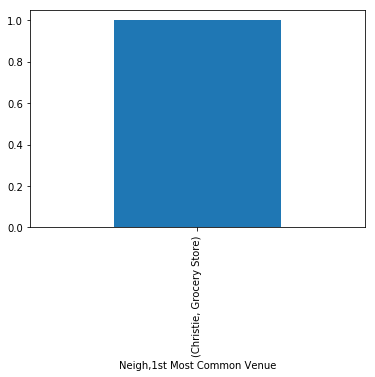

In [289]:
Cluster5.groupby('Neigh')['1st Most Common Venue'].value_counts().plot(kind='bar')

In [150]:
Cluster5= Borough_Merged.loc[Borough_Merged['ClustLabels'] == 5, Borough_Merged.columns[[1] + list(range(2, Borough_Merged.shape[1]))]]

In [300]:
Cluster1.columns[0:8]

Index(['Borough', 'Neigh', 'Latitude', 'Longitude', 'ClustLabels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue'],
      dtype='object')

In [324]:
TOP3 = Cluster1[['Borough', 'Neigh', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue']]

In [325]:
TOP3.shape

(13, 5)

In [326]:
TOP3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 51 to 70
Data columns (total 5 columns):
Borough                  13 non-null object
Neigh                    13 non-null object
1st Most Common Venue    13 non-null object
2nd Most Common Venue    13 non-null object
3rd Most Common Venue    13 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


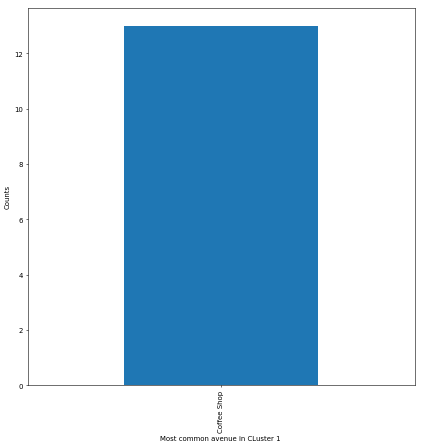

In [327]:
plt.figure(figsize=(10,10), dpi=50)


TOP3.groupby('1st Most Common Venue')['Neigh'].count().nlargest(30).plot(kind='bar')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

In [336]:
plt.figure(figsize=(10,10), dpi=50)


TOP3.groupby('Neigh')[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']].value_counts().plot(kind='barh')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

<Figure size 500x500 with 0 Axes>

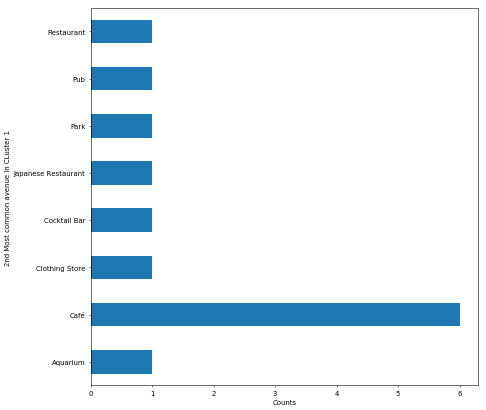

In [347]:
plt.figure(figsize=(10,10), dpi=50)


TOP3.groupby('2nd Most Common Venue')['2nd Most Common Venue'].count().plot(kind='barh')

plt.ylabel('2nd Most common avenue in CLuster 1 ')
plt.xlabel('Counts')
plt.show()

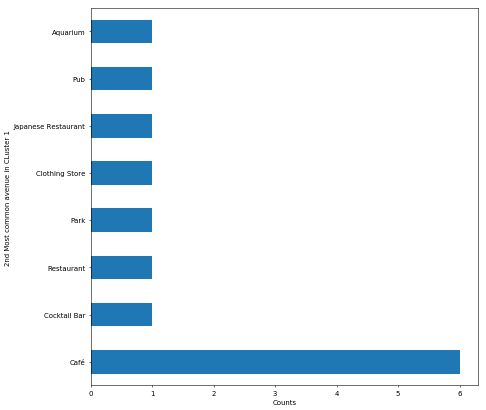

In [348]:
plt.figure(figsize=(10,10), dpi=50)


TOP3['2nd Most Common Venue'].value_counts().plot(kind='barh')

plt.ylabel('2nd Most common avenue in CLuster 1 ')
plt.xlabel('Counts')
plt.show()

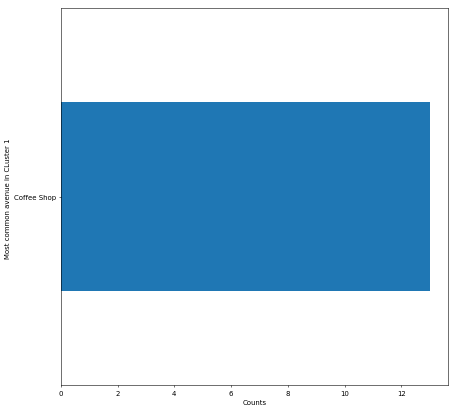

In [341]:
plt.figure(figsize=(10,10), dpi=50)


TOP3.groupby('1st Most Common Venue')['1st Most Common Venue'].count().plot(kind='barh')

plt.ylabel('Most common avenue in CLuster 1 ')
plt.xlabel('Counts')
plt.show()

<Figure size 500x500 with 0 Axes>

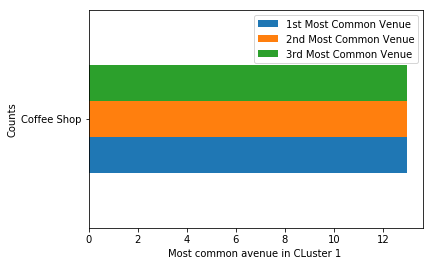

In [339]:
plt.figure(figsize=(10,10), dpi=50)


TOP3.groupby('1st Most Common Venue')[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']].count().plot(kind='barh')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

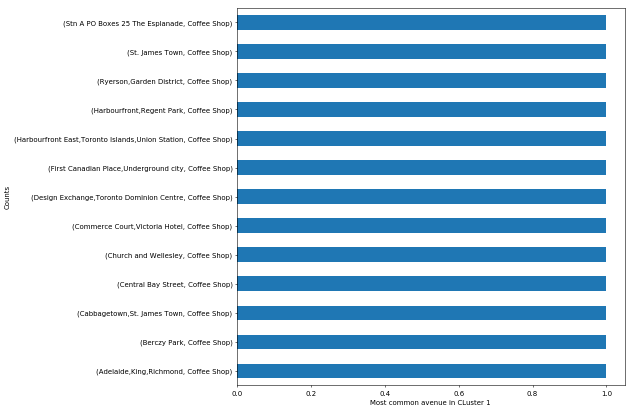

In [319]:
plt.figure(figsize=(10,10), dpi=50)


Cluster1.groupby('Neigh')['1st Most Common Venue'].value_counts().nlargest(30).plot(kind='barh')

plt.xlabel('Most common avenue in CLuster 1 ')
plt.ylabel('Counts')
plt.show()

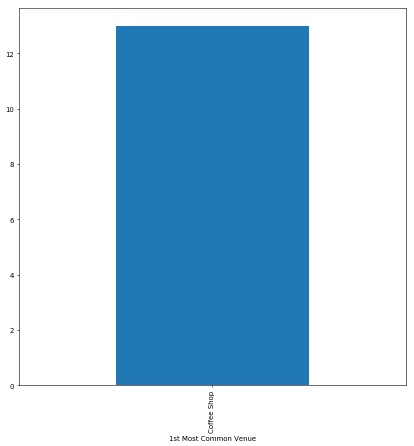

In [321]:
plt.figure(figsize=(10,10), dpi=50)


Cluster1.groupby('1st Most Common Venue')['1st Most Common Venue'].count().nlargest(30).plot(kind='bar')

plt.show()

In [195]:
path = 'C:/Users/Mokht/OneDrive/ward-profiles-2016-census-data.xlsx'

In [198]:
census_data = pd.read_csv(path)

FileNotFoundError: [Errno 2] File b'C:/Users/Mokht/OneDrive/ward-profiles-2016-census-data.xlsx' does not exist: b'C:/Users/Mokht/OneDrive/ward-profiles-2016-census-data.xlsx'

In [ ]:
path = 'C:/Users/Mokht/Bureau/wellbeing-toronto-demographics-taxfiler-indicators.csv'

In [205]:
path = 'C:/Users/Mokht/Bureau/wellbeing-toronto-demographics-taxfiler-indicators.csv'

In [206]:
taxfilers = pd.read_csv(path)

FileNotFoundError: [Errno 2] File b'C:/Users/Mokht/Bureau/wellbeing-toronto-demographics-taxfiler-indicators.csv' does not exist: b'C:/Users/Mokht/Bureau/wellbeing-toronto-demographics-taxfiler-indicators.csv'

In [184]:
path = 'C:/Users/Mokht/OneDrive/Bureau/neighbourhood-profiles-2016-csv.csv'

In [185]:
neigh_profiles = pd.read_csv(path)

In [186]:
neigh_profiles.shape

(2383, 146)

In [187]:
neigh_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


In [188]:
neigh_profiles.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [103]:
path = 'C:/Users/Mokht/OneDrive/Bureau/wellbeing_toronto.csv'

In [104]:
popu_toronto = pd.read_csv(path)

In [105]:
popu_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
Neighbourhood       140 non-null object
Neighbourhood Id    140 non-null float64
Total Population    140 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [166]:
popu_toronto = popu_toronto.drop('Neighbourhood' ,axis=1)

In [167]:
popu_toronto

,Neighbourhood Id,Total Population
0,1.0,33312.0
1,2.0,32954.0
2,3.0,10360.0
3,4.0,10529.0
4,5.0,9456.0
5,6.0,22000.0
6,7.0,22156.0
7,8.0,10948.0
8,9.0,15535.0
9,10.0,11051.0


In [106]:
world_map = folium.Map()
world_map

In [172]:
map_Toronto.choropleth(
    geo_data= Toronto,
    data = testdf,
    columns =['Neigh', 'Total Population'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Toronto',
)

ValueError: Unhandled object     Post           Borough                                              Neigh  \
0    M1B       Scarborough                                      Rouge,Malvern   
1    M1C       Scarborough               Highland Creek,Rouge Hill,Port Union   
2    M1E       Scarborough                    Guildwood,Morningside,West Hill   
3    M1G       Scarborough                                             Woburn   
4    M1H       Scarborough                                          Cedarbrae   
5    M1J       Scarborough                                Scarborough Village   
6    M1K       Scarborough          East Birchmount Park,Ionview,Kennedy Park   
7    M1L       Scarborough                      Clairlea,Golden Mile,Oakridge   
8    M1M       Scarborough      Cliffcrest,Cliffside,Scarborough Village West   
9    M1N       Scarborough                         Birch Cliff,Cliffside West   
10   M1P       Scarborough  Dorset Park,Scarborough Town Centre,Wexford He...   
11   M1R       Scarborough                                   Maryvale,Wexford   
12   M1S       Scarborough                                          Agincourt   
13   M1T       Scarborough              Clarks Corners,Sullivan,Tam O'Shanter   
14   M1V       Scarborough  Agincourt North,L'Amoreaux East,Milliken,Steel...   
15   M1W       Scarborough                                    L'Amoreaux West   
16   M1X       Scarborough                                        Upper Rouge   
17   M2H        North York                                  Hillcrest Village   
18   M2J        North York                         Fairview,Henry Farm,Oriole   
19   M2K        North York                                    Bayview Village   
20   M2L        North York                            Silver Hills,York Mills   
21   M2M        North York                             Newtonbrook,Willowdale   
22   M2N        North York                                   Willowdale South   
23   M2P        North York                                    York Mills West   
24   M2R        North York                                    Willowdale West   
25   M3A        North York                                          Parkwoods   
26   M3B        North York                                    Don Mills North   
27   M3C        North York                    Flemingdon Park,Don Mills South   
28   M3H        North York      Bathurst Manor,Downsview North,Wilson Heights   
29   M3J        North York                     Northwood Park,York University   
30   M3K        North York                         CFB Toronto,Downsview East   
31   M3L        North York                                     Downsview West   
32   M3M        North York                                  Downsview Central   
33   M3N        North York                                Downsview Northwest   
34   M4A        North York                                   Victoria Village   
35   M4B         East York                     Woodbine Gardens,Parkview Hill   
36   M4C         East York                                   Woodbine Heights   
37   M4E      East Toronto                                        The Beaches   
38   M4G         East York                                            Leaside   
39   M4H         East York                                   Thorncliffe Park   
40   M4J         East York                                       East Toronto   
41   M4K      East Toronto                        The Danforth West,Riverdale   
42   M4L      East Toronto                      The Beaches West,India Bazaar   
43   M4M      East Toronto                                    Studio District   
44   M4N   Central Toronto                                      Lawrence Park   
45   M4P   Central Toronto                                   Davisville North   
46   M4R   Central Toronto                                 North Toronto West   
47   M4S   Central Toronto                                         Davisville   
48   M4T   Central Toronto                         Moore Park,Summerhill East   
49   M4V   Central Toronto  Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
50   M4W  Downtown Toronto                                           Rosedale   
51   M4X  Downtown Toronto                         Cabbagetown,St. James Town   
52   M4Y  Downtown Toronto                               Church and Wellesley   
53   M5A  Downtown Toronto                           Harbourfront,Regent Park   
54   M5B  Downtown Toronto                            Ryerson,Garden District   
55   M5C  Downtown Toronto                                     St. James Town   
56   M5E  Downtown Toronto                                        Berczy Park   
57   M5G  Downtown Toronto                                 Central Bay Street   
58   M5H  Downtown Toronto                             Adelaide,King,Richmond   
59   M5J  Downtown Toronto    Harbourfront East,Toronto Islands,Union Station   
60   M5K  Downtown Toronto            Design Exchange,Toronto Dominion Centre   
61   M5L  Downtown Toronto                      Commerce Court,Victoria Hotel   
62   M5M        North York                   Bedford Park,Lawrence Manor East   
63   M5N   Central Toronto                                           Roselawn   
64   M5P   Central Toronto                 Forest Hill North,Forest Hill West   
65   M5R   Central Toronto                  The Annex,North Midtown,Yorkville   
66   M5S  Downtown Toronto                      Harbord,University of Toronto   
67   M5T  Downtown Toronto            Chinatown,Grange Park,Kensington Market   
68   M5V  Downtown Toronto  CN Tower,Bathurst Quay,Island airport,Harbourf...   
69   M5W  Downtown Toronto                    Stn A PO Boxes 25 The Esplanade   
70   M5X  Downtown Toronto              First Canadian Place,Underground city   
71   M6A        North York                    Lawrence Heights,Lawrence Manor   
72   M6B        North York                                          Glencairn   
73   M6C              York                                 Humewood-Cedarvale   
74   M6E              York                                Caledonia-Fairbanks   
75   M6G  Downtown Toronto                                           Christie   
76   M6H      West Toronto                        Dovercourt Village,Dufferin   
77   M6J      West Toronto                            Little Portugal,Trinity   
78   M6K      West Toronto         Brockton,Exhibition Place,Parkdale Village   
79   M6L        North York                   Downsview,North Park,Upwood Park   
80   M6M              York        Del Ray,Keelesdale,Mount Dennis,Silverthorn   
81   M6N              York                       The Junction North,Runnymede   
82   M6P      West Toronto                       High Park,The Junction South   
83   M6R      West Toronto                              Parkdale,Roncesvalles   
84   M6S      West Toronto                                  Runnymede,Swansea   
85   M7A      Queen's Park                                       Queen's Park   
86   M7R       Mississauga              Canada Post Gateway Processing Centre   
87   M7Y      East Toronto  Business Reply Mail Processing Centre 969 Eastern   
88   M8V         Etobicoke         Humber Bay Shores,Mimico South,New Toronto   
89   M8W         Etobicoke                              Alderwood,Long Branch   
90   M8X         Etobicoke        The Kingsway,Montgomery Road,Old Mill North   
91   M8Y         Etobicoke  Humber Bay,King's Mill Park,Kingsway Park Sout...   
92   M8Z         Etobicoke  Kingsway Park South West,Mimico NW,The Queensw...   
93   M9A         Etobicoke                                   Islington Avenue   
94   M9B         Etobicoke  Cloverdale,Islington,Martin Grove,Princess Gar...   
95   M9C         Etobicoke  Bloordale Gardens,Eringate,Markland Wood,Old B...   
96   M9L        North York                                      Humber Summit   
97   M9M        North York                                    Emery,Humberlea   
98   M9N              York                                             Weston   
99   M9P         Etobicoke                                          Westmount   
100  M9R         Etobicoke  Kingsview Village,Martin Grove Gardens,Richvie...   
101  M9V         Etobicoke  Albion Gardens,Beaumond Heights,Humbergate,Jam...   
102  M9W         Etobicoke                                          Northwest   

      Latitude  Longitude  
0    43.806686 -79.194353  
1    43.784535 -79.160497  
2    43.763573 -79.188711  
3    43.770992 -79.216917  
4    43.773136 -79.239476  
5    43.744734 -79.239476  
6    43.727929 -79.262029  
7    43.711112 -79.284577  
8    43.716316 -79.239476  
9    43.692657 -79.264848  
10   43.757410 -79.273304  
11   43.750072 -79.295849  
12   43.794200 -79.262029  
13   43.781638 -79.304302  
14   43.815252 -79.284577  
15   43.799525 -79.318389  
16   43.836125 -79.205636  
17   43.803762 -79.363452  
18   43.778517 -79.346556  
19   43.786947 -79.385975  
20   43.757490 -79.374714  
21   43.789053 -79.408493  
22   43.770120 -79.408493  
23   43.752758 -79.400049  
24   43.782736 -79.442259  
25   43.753259 -79.329656  
26   43.745906 -79.352188  
27   43.725900 -79.340923  
28   43.754328 -79.442259  
29   43.767980 -79.487262  
30   43.737473 -79.464763  
31   43.739015 -79.506944  
32   43.728496 -79.495697  
33   43.761631 -79.520999  
34   43.725882 -79.315572  
35   43.706397 -79.309937  
36   43.695344 -79.318389  
37   43.676357 -79.293031  
38   43.709060 -79.363452  
39   43.705369 -79.349372  
40   43.685347 -79.338106  
41   43.679557 -79.352188  
42   43.668999 -79.315572  
43   43.659526 -79.340923  
44   43.728020 -79.388790  
45   43.712751 -79.390197  
46   43.715383 -79.405678  
47   43.704324 -79.388790  
48   43.689574 -79.383160  
49   43.686412 -79.400049  
50   43.679563 -79.377529  
51   43.667967 -79.367675  
52   43.665860 -79.383160  
53   43.654260 -79.360636  
54   43.657162 -79.378937  
55   43.651494 -79.375418  
56   43.644771 -79.373306  
57   43.657952 -79.387383  
58   43.650571 -79.384568  
59   43.640816 -79.381752  
60   43.647177 -79.381576  
61   43.648198 -79.379817  
62   43.733283 -79.419750  
63   43.711695 -79.416936  
64   43.696948 -79.411307  
65   43.672710 -79.405678  
66   43.662696 -79.400049  
67   43.653206 -79.400049  
68   43.628947 -79.394420  
69   43.646435 -79.374846  
70   43.648429 -79.382280  
71   43.718518 -79.464763  
72   43.709577 -79.445073  
73   43.693781 -79.428191  
74   43.689026 -79.453512  
75   43.669542 -79.422564  
76   43.669005 -79.442259  
77   43.647927 -79.419750  
78   43.636847 -79.428191  
79   43.713756 -79.490074  
80   43.691116 -79.476013  
81   43.673185 -79.487262  
82   43.661608 -79.464763  
83   43.648960 -79.456325  
84   43.651571 -79.484450  
85   43.662301 -79.389494  
86   43.636966 -79.615819  
87   43.662744 -79.321558  
88   43.605647 -79.501321  
89   43.602414 -79.543484  
90   43.653654 -79.506944  
91   43.636258 -79.498509  
92   43.628841 -79.520999  
93   43.667856 -79.532242  
94   43.650943 -79.554724  
95   43.643515 -79.577201  
96   43.756303 -79.565963  
97   43.724766 -79.532242  
98   43.706876 -79.518188  
99   43.696319 -79.532242  
100  43.688905 -79.554724  
101  43.739416 -79.588437  
102  43.706748 -79.594054  .

In [173]:
testdf = pd.concat([Toronto, popu_toronto], axis=1)

In [174]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
Post                103 non-null object
Borough             103 non-null object
Neigh               103 non-null object
Latitude            103 non-null float64
Longitude           103 non-null float64
Neighbourhood Id    140 non-null float64
Total Population    140 non-null float64
dtypes: float64(4), object(3)
memory usage: 7.7+ KB


In [175]:
testdf = testdf.dropna(axis=0)

In [176]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 7 columns):
Post                103 non-null object
Borough             103 non-null object
Neigh               103 non-null object
Latitude            103 non-null float64
Longitude           103 non-null float64
Neighbourhood Id    103 non-null float64
Total Population    103 non-null float64
dtypes: float64(4), object(3)
memory usage: 6.4+ KB


In [177]:
SanData.choropleth(
    geo_data= sangeo_path,
    data = sangeocsv,
    columns =['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Sanfranciso Crime Rate',
)

NameError: name 'SanData' is not defined

In [178]:
testdf.plot(kind='box', x='Neighbourhood', y='Total Population')

KeyError: 'Neighbourhood'

In [179]:
testdf.describe()

,Latitude,Longitude,Neighbourhood Id,Total Population
count,103.000000,103.000000,103.000000,103.000000
mean,43.704608,-79.397153,52.000000,18601.650485
std,0.052463,0.097146,29.877528,9535.042271
min,43.602414,-79.615819,1.000000,7607.000000
25%,43.660567,-79.464763,26.500000,11727.000000
50%,43.696948,-79.388790,52.000000,16097.000000
75%,43.745320,-79.340923,77.500000,22078.000000
max,43.836125,-79.160497,103.000000,65913.000000


In [154]:
pop30000= testdf[testdf['Total Population'] >= 30000

In [156]:
pop30000

,Post,Borough,Neigh,Latitude,Longitude,Neighbourhood,Neighbourhood Id,Total Population
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,West Humber-Clairville,1.0,33312.0
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Mount Olive-Silverstone-Jamestown,2.0,32954.0
13,M1T,Scarborough,"Clarks Corners,Sullivan,Tam O'Shanter",43.781638,-79.304302,Islington-City Centre West,14.0,43965.0
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,Mimico,17.0,33964.0
24,M2R,North York,Willowdale West,43.782736,-79.442259,Glenfield-Jane Heights,25.0,30491.0
25,M3A,North York,Parkwoods,43.753259,-79.329656,Downsview-Roding-CFB,26.0,35052.0
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Parkwoods-Donalda,45.0,34805.0
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,Willowdale East,51.0,50434.0
74,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,Church-Yonge Corridor,75.0,31340.0
76,M6H,West Toronto,"Dovercourt Village,Dufferin",43.669005,-79.442259,Waterfront Communities-The Island,77.0,65913.0


In [162]:
map_Toronto.choropleth(
    geo_data= pop30000,
    data = pop30000,
    columns =['Neighbourhood','Total Population'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Toronto',
)

ValueError: Unhandled object    Post           Borough                                              Neigh  \
0   M1B       Scarborough                                      Rouge,Malvern   
1   M1C       Scarborough               Highland Creek,Rouge Hill,Port Union   
13  M1T       Scarborough              Clarks Corners,Sullivan,Tam O'Shanter   
16  M1X       Scarborough                                        Upper Rouge   
24  M2R        North York                                    Willowdale West   
25  M3A        North York                                          Parkwoods   
44  M4N   Central Toronto                                      Lawrence Park   
50  M4W  Downtown Toronto                                           Rosedale   
74  M6E              York                                Caledonia-Fairbanks   
76  M6H      West Toronto                        Dovercourt Village,Dufferin   
81  M6N              York                       The Junction North,Runnymede   
92  M8Z         Etobicoke  Kingsway Park South West,Mimico NW,The Queensw...   
94  M9B         Etobicoke  Cloverdale,Islington,Martin Grove,Princess Gar...   

     Latitude  Longitude                      Neighbourhood  Neighbourhood Id  \
0   43.806686 -79.194353             West Humber-Clairville               1.0   
1   43.784535 -79.160497  Mount Olive-Silverstone-Jamestown               2.0   
13  43.781638 -79.304302         Islington-City Centre West              14.0   
16  43.836125 -79.205636                             Mimico              17.0   
24  43.782736 -79.442259             Glenfield-Jane Heights              25.0   
25  43.753259 -79.329656               Downsview-Roding-CFB              26.0   
44  43.728020 -79.388790                  Parkwoods-Donalda              45.0   
50  43.679563 -79.377529                    Willowdale East              51.0   
74  43.689026 -79.453512              Church-Yonge Corridor              75.0   
76  43.669005 -79.442259  Waterfront Communities-The Island              77.0   
81  43.673185 -79.487262                            Niagara              82.0   
92  43.628841 -79.520999  Dovercourt-Wallace Emerson-Juncti              93.0   
94  43.650943 -79.554724                              Annex              95.0   

    Total Population  
0            33312.0  
1            32954.0  
13           43965.0  
16           33964.0  
24           30491.0  
25           35052.0  
44           34805.0  
50           50434.0  
74           31340.0  
76           65913.0  
81           31180.0  
92           36625.0  
94           30526.0  .

In [160]:
world

NameError: name 'world' is not defined